## Deliberated Aberration Data
- Data obtained on 06/06/17. Full cubes
- Continued from previous trials where the sliced images were somehow sub-sampled. The original cubes dealt with here should not suffer from same problems

In [125]:
%%capture
%load_ext autoreload
%autoreload 2+

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.ndimage.interpolation import rotate
exec(open('../codes/zernike.py'))
exec(open('../codes/pr.py'))
exec(open('../codes/util.py'))
%matplotlib inline

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

In [60]:
predir = '../../data/GS_&_PD_data_10_17_2016/'
wvl    = 1.646 # micron, H-band

### <font color="blue">Some notes about data</font>
1. 
2. 

#### <font color="magenta">Notes:</font>
1. 

---
### Data - the "Standard" PSF (not aberrated)

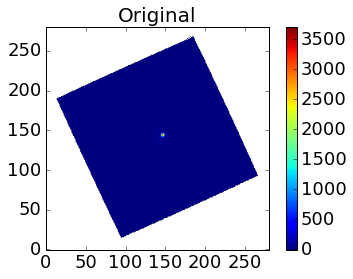

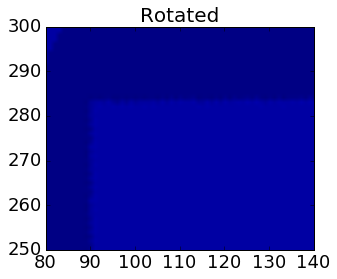

In [63]:
from astropy.io import fits
no_aber_path = predir+'S20161018E0016_spdc.fits'

no_aber = data_manage(path=no_aber_path,angle=24.4,cube=True)
no_aber(wvl)
no_aber_rot = no_aber.rot_img(xlim=(80,140),ylim=(250,300))

Rotating with 24.4 degrees is still the best angle.

---
### Plus 300 nm defocus

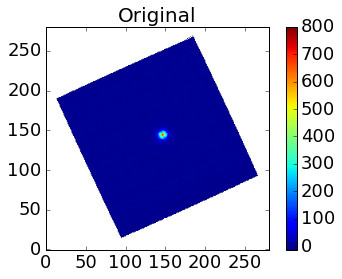

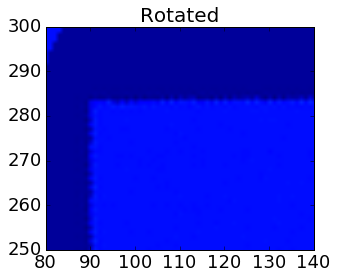

In [64]:
plus_300_path = predir+'S20161018E0014_spdc.fits'

plus_300 = data_manage(path=plus_300_path,angle=24.4,cube=True)
plus_300(wvl)
plus_300_rot = plus_300.rot_img(xlim=(80,140),ylim=(250,300))

---
### Ast. 150 nm (and +150nm focus)

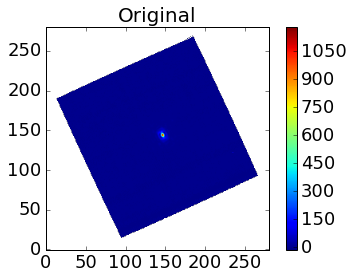

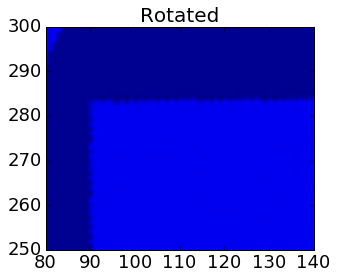

In [66]:
ast_150_path = predir+'S20161018E0026_spdc.fits'

ast_150 = data_manage(path=ast_150_path,angle=24.4,cube=True)
ast_150(wvl)
ast_150_rot = ast_150.rot_img(xlim=(80,140),ylim=(250,300))

---
### Ast. 50nm only

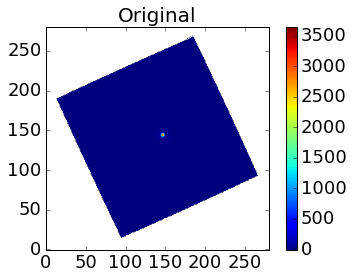

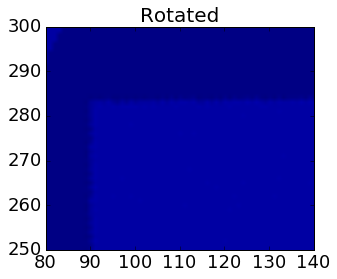

In [144]:
ast_50_path = predir+'S20161018E0020_spdc.fits'

ast_50 = data_manage(path=ast_50_path,angle=24.4,cube=True)
ast_50(wvl)
ast_50_rot = ast_50.rot_img(xlim=(80,140),ylim=(250,300))

---
### +150 astig (2,2), +150 coma (3,1), +100 trefoil (3,3), +100 quadifoil (4,4)

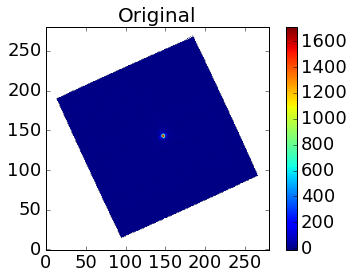

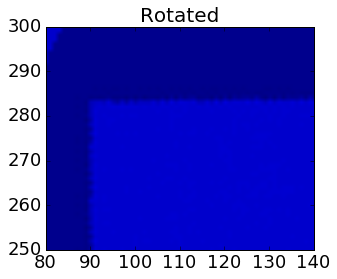

In [143]:
complex1_path = predir+'S20161018E0031_spdc.fits'

complex1 = data_manage(path=complex1_path,angle=24.4,cube=True)
complex1(wvl)
complex1_rot = complex1.rot_img(xlim=(80,140),ylim=(250,300))

---
## <font color="blue">Peak and Center</font>
#### Notes:
1. One potential issue: the interpolation (rotation) has "skewed" the pixels. The reconstruction will certainly be biased.

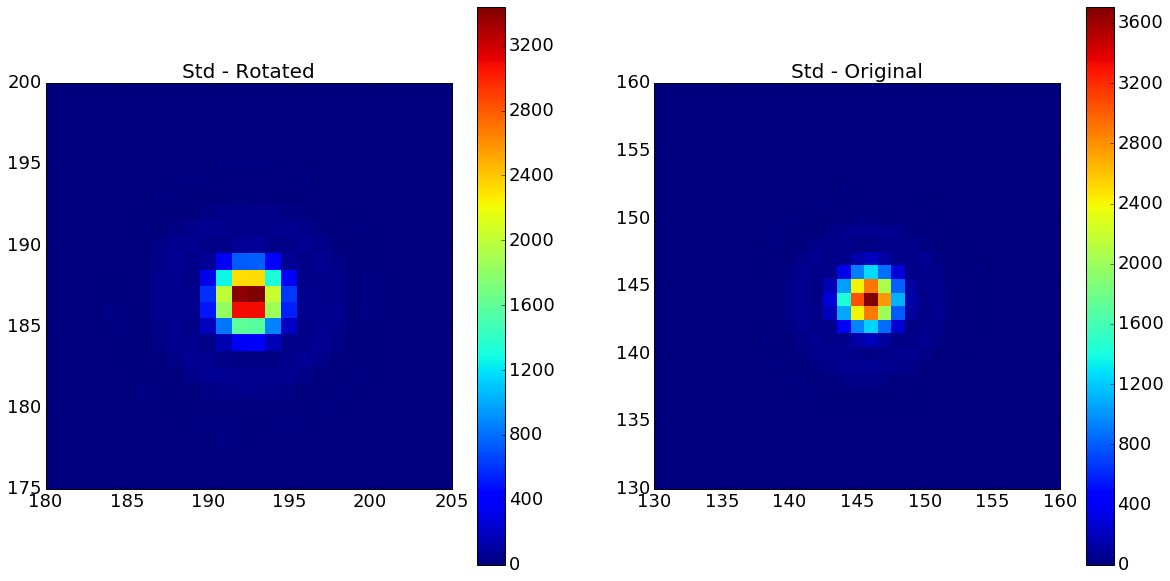

In [76]:
xlim = (180,205)
ylim = (175,200)

xlim2 = (130,160)
ylim2 = (130,160)

##
plt.figure(figsize=(20,10))
plt.subplot(121); plt.title('Std - Rotated')
plt.imshow(no_aber_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(no_aber_rot))

plt.subplot(122); plt.title('Std - Original')
plt.imshow(no_aber.data_slc,origin='lower',interpolation='none')
plt.xlim(xlim2); plt.ylim(ylim2); 
plt.colorbar(); plt.clim(0,np.nanmax(no_aber.data_slc))

FWHM has changed from 3 to 4

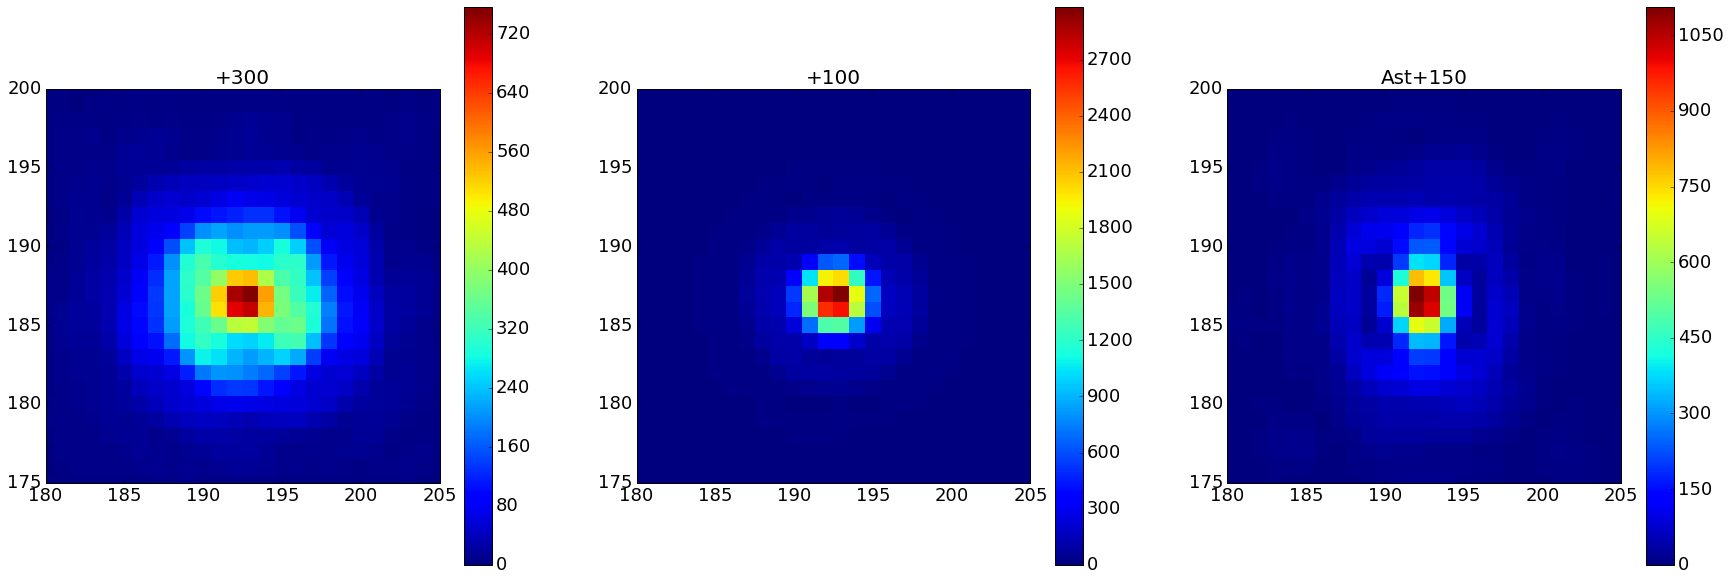

In [77]:
##
plt.figure(figsize=(30,10))
plt.subplot(131); plt.title('+300')
plt.imshow(plus_300_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(plus_300_rot))

plt.subplot(132); plt.title('+100')
plt.imshow(plus_100_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(plus_100_rot))

plt.subplot(133); plt.title('Ast+150')
plt.imshow(ast_150_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(ast_150_rot))

The centers are (193,187), (193,187), and (192,187) respectively

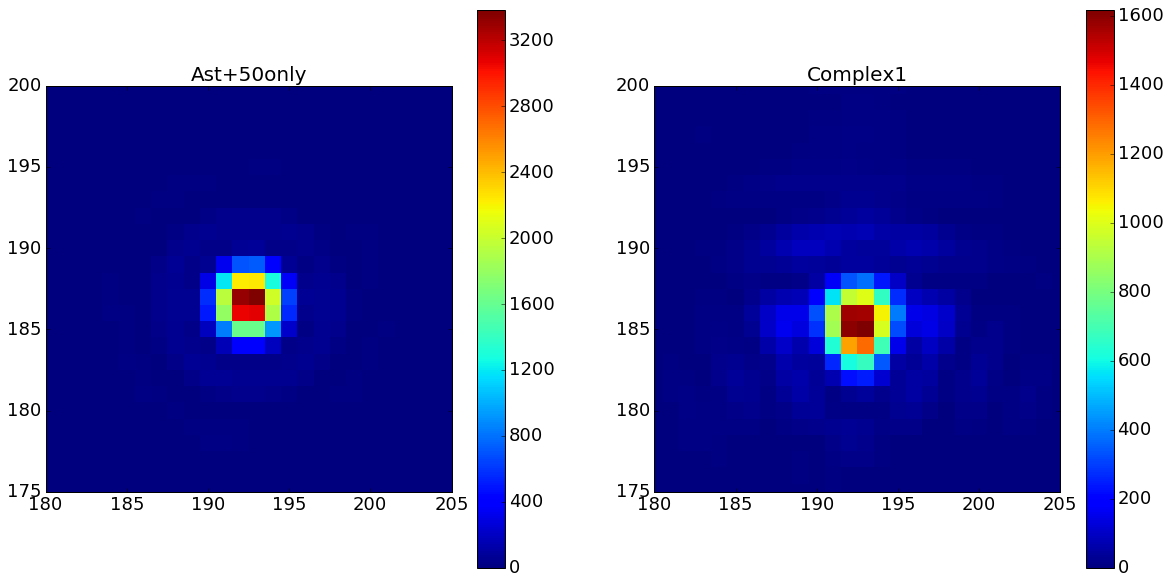

In [147]:
##
plt.figure(figsize=(20,10))
plt.subplot(121); plt.title('Ast+50only')
plt.imshow(ast_50_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(ast_50_rot))

plt.subplot(122); plt.title('Complex1')
plt.imshow(complex1_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(complex1_rot))

We'll assume the centers to be (193,187) and (193,187), same as before.

#### <font color="magenta">Note: Any shifting of the center could manifest itself later as tip/tilt!!!!!!</font>

---
## <font color="red">Defining "oversampling" for PR purpose</font>
** *See the original [notebook](https://nbviewer.jupyter.org/github/Mipanox/GPI_stuff/blob/master/othernotebooks/data_handling.ipynb)* **


In our cases, for example, the oversampling (from rotated images) to input to PR routines is 4/2.4~1.67

---
## <font color="blue">Masking - clipping the images</font>
Again, default circular windowing

### Applying to all images 

In [148]:
Npix = 512
size = 20

##
no_aber_clp  = clipping(no_aber_rot, Npix=Npix,center=(193,187),size=size)
plus_300_clp = clipping(plus_300_rot,Npix=Npix,center=(193,187),size=size)
plus_100_clp = clipping(plus_100_rot,Npix=Npix,center=(193,187),size=size)
ast_150_clp  = clipping(ast_150_rot, Npix=Npix,center=(192,187),size=size)
ast_50_clp   = clipping(ast_50_rot,  Npix=Npix,center=(193,187),size=size)
complex1_clp = clipping(complex1_rot,Npix=Npix,center=(193,187),size=size)

(220, 290)

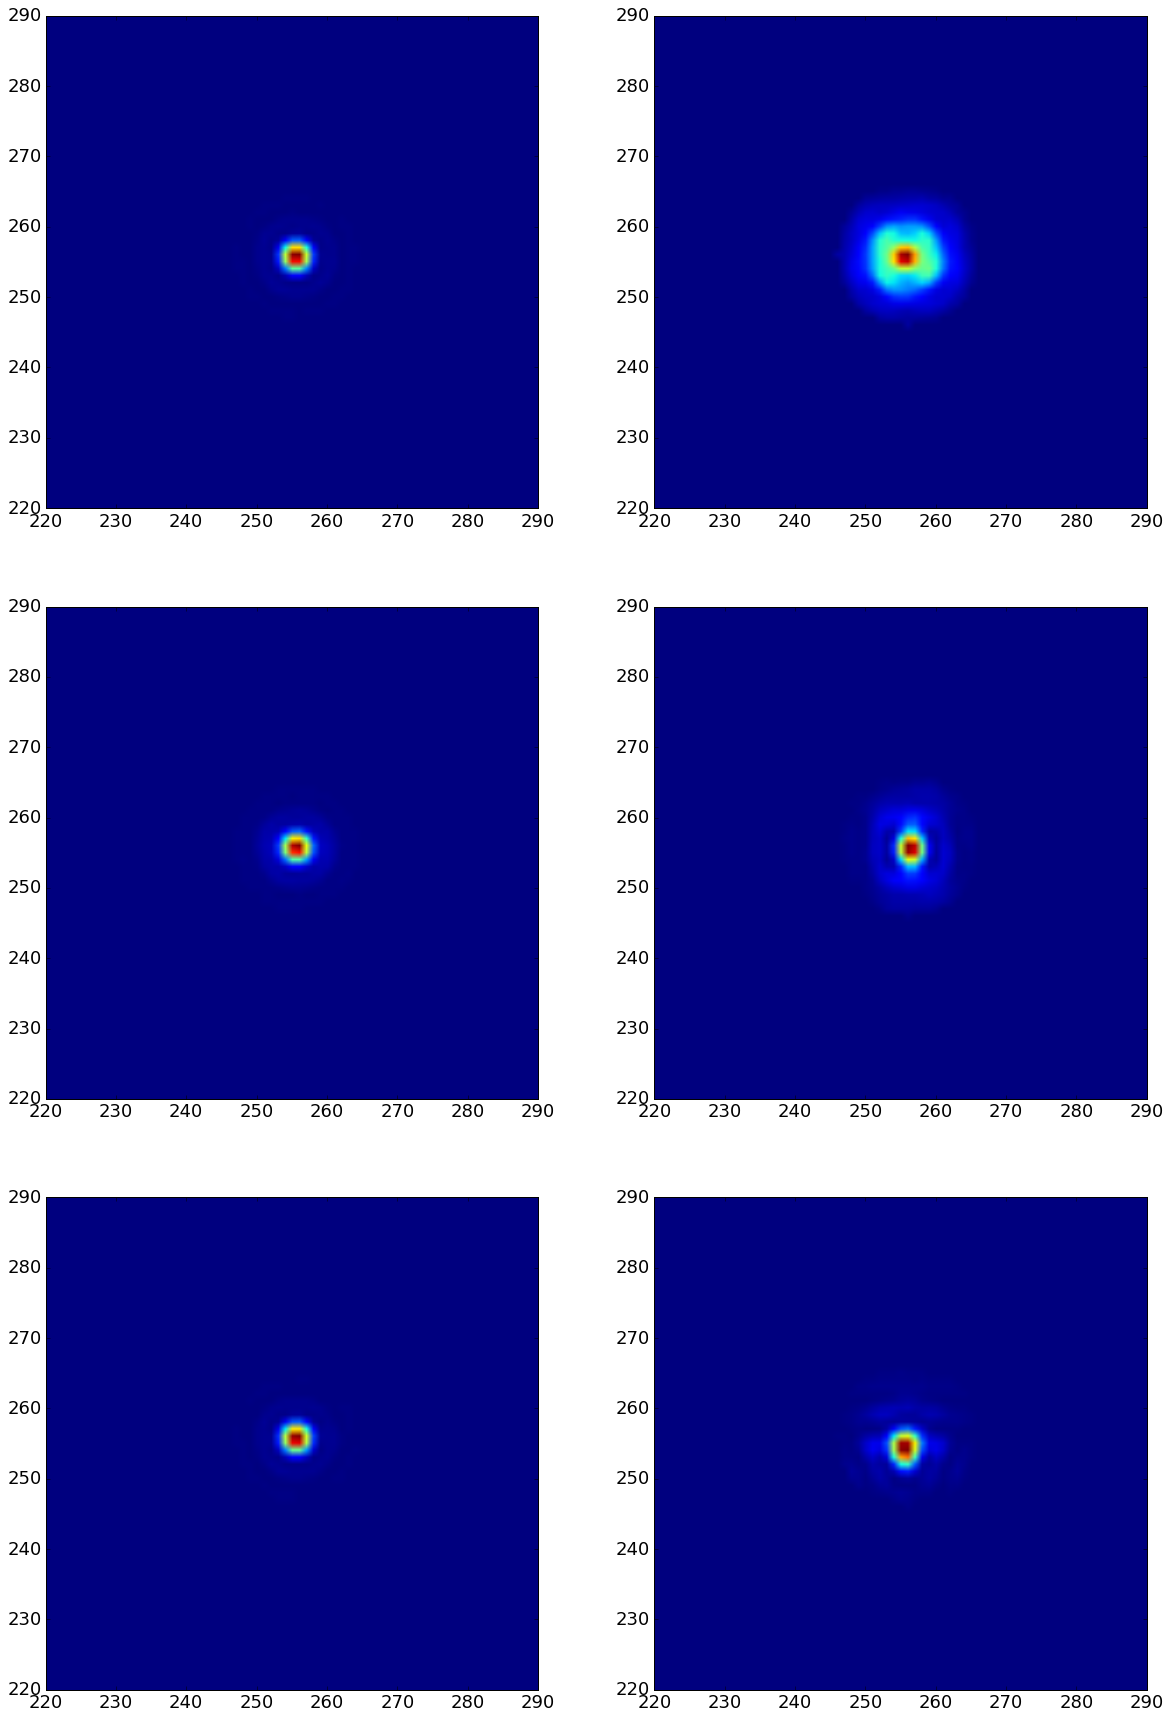

In [149]:
plt.figure(figsize=(20,30))
plt.subplot(321); plt.imshow(no_aber_clp, origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(322); plt.imshow(plus_300_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(323); plt.imshow(plus_100_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(324); plt.imshow(ast_150_clp, origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(325); plt.imshow(ast_50_clp,  origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(326); plt.imshow(complex1_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)

The 300nm defocusing looks somewhat strange though. Will see below for the original image (_Updated: It IS weird. May contain some astigmatism or whatnot)_

---
## <font color="orange">PR</font>
#### <font color="cyan">!!! Assumed uniform aperture !!!</font>
#### 1. No-aber

In [151]:
## assume all images were taken under same condition
oversamp = 1.67

## setup
no_aber_PR = PR(foc=no_aber_clp,oversamp=oversamp)

Down-sampled array dimension is not even: 153 pix
 Changed to nearest oversamp: 1.66 that gives even-sized arrays


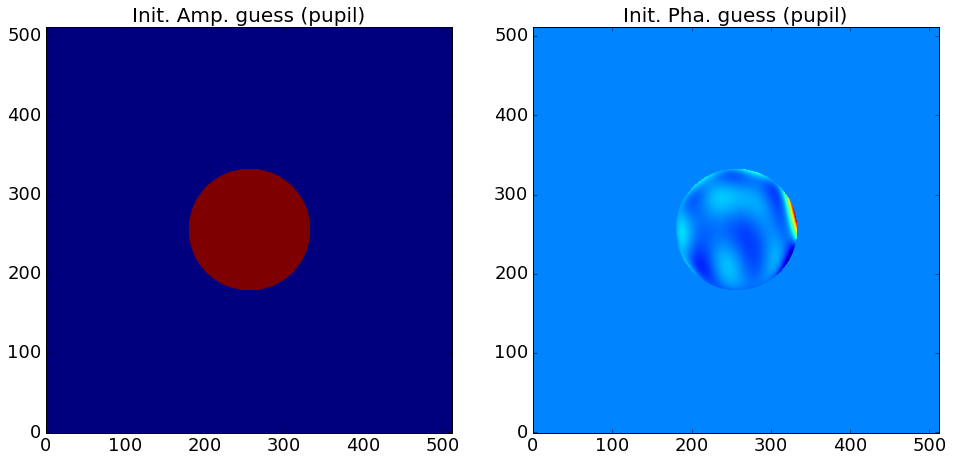

Current filter:


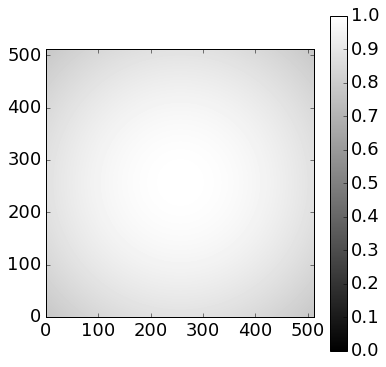

Current iter. : 100
        Error : 3.57e-02
Current iter. : 200
        Error : 3.57e-02
Current filter:


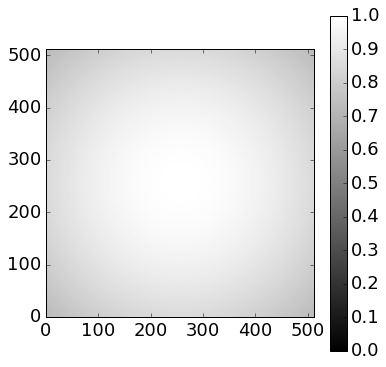

Current iter. : 300
        Error : 3.57e-02
Current iter. : 400
        Error : 3.57e-02
Current filter:


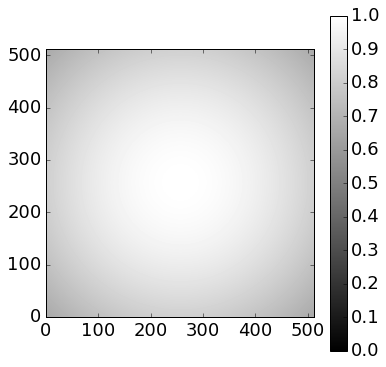

Current iter. : 500
        Error : 3.57e-02
Current iter. : 600
        Error : 3.57e-02
Current filter:


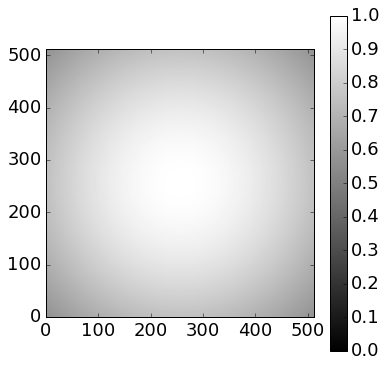

Current iter. : 700
        Error : 3.57e-02
Current iter. : 800
        Error : 3.57e-02
Current filter:


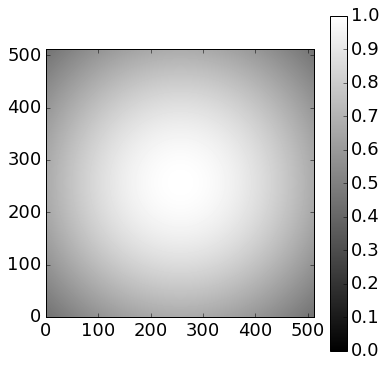

Current iter. : 900
        Error : 3.57e-02
Current iter. : 1000
        Error : 3.57e-02
Current filter:


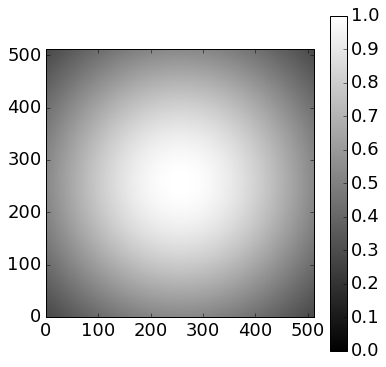

Current iter. : 1100
        Error : 3.57e-02
Current iter. : 1200
        Error : 3.57e-02
Current filter:


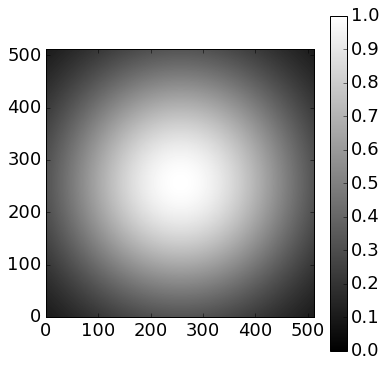

Current iter. : 1300
        Error : 3.57e-02
Current iter. : 1400
        Error : 3.57e-02
Current filter:


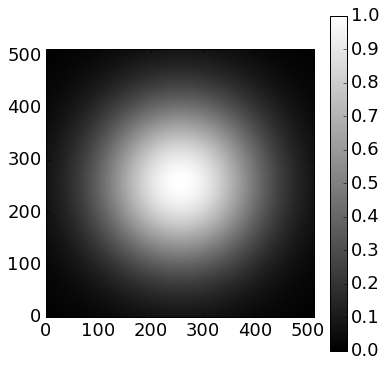

Current iter. : 1500
        Error : 3.57e-02
Current iter. : 1600
        Error : 3.57e-02
Current filter:


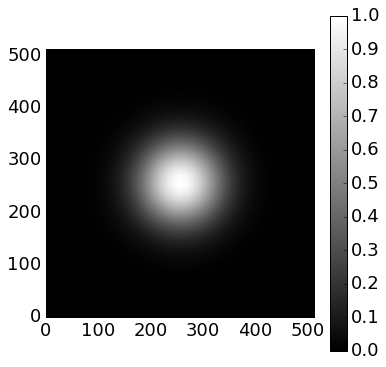

Current iter. : 1700
        Error : 3.57e-02
Current iter. : 1800
        Error : 3.57e-02
Current filter:


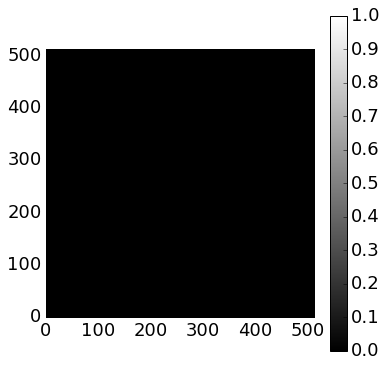

Current iter. : 1900
        Error : 3.57e-02
Current iter. : 2000
        Error : 3.57e-02
-----------------------
First iteration error: 1.41e-01
Final iteration : 2000
Final Error: 3.57e-02


In [92]:
no_aber_pup,no_aber_foc, \
no_aber_errlist, \
no_aber_pup_proj, \
no_aber_errpuplist = no_aber_PR.OSS(beta=0.5,force_only_phase=True,init='random')

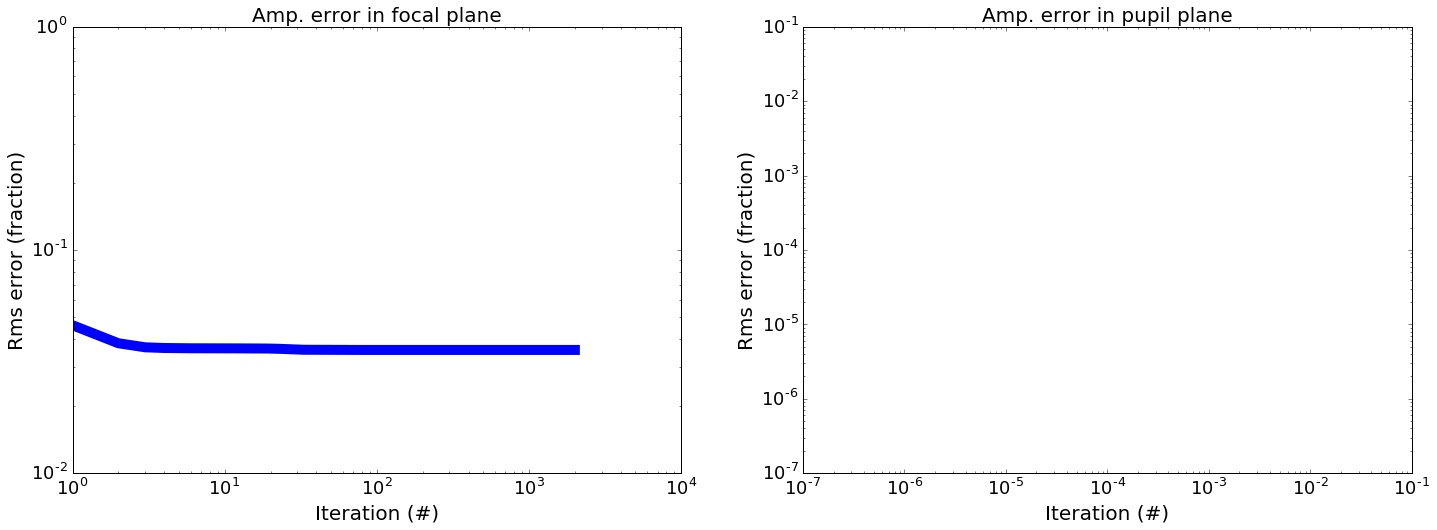

In [93]:
plot_errlist(no_aber_errlist,no_aber_errpuplist)

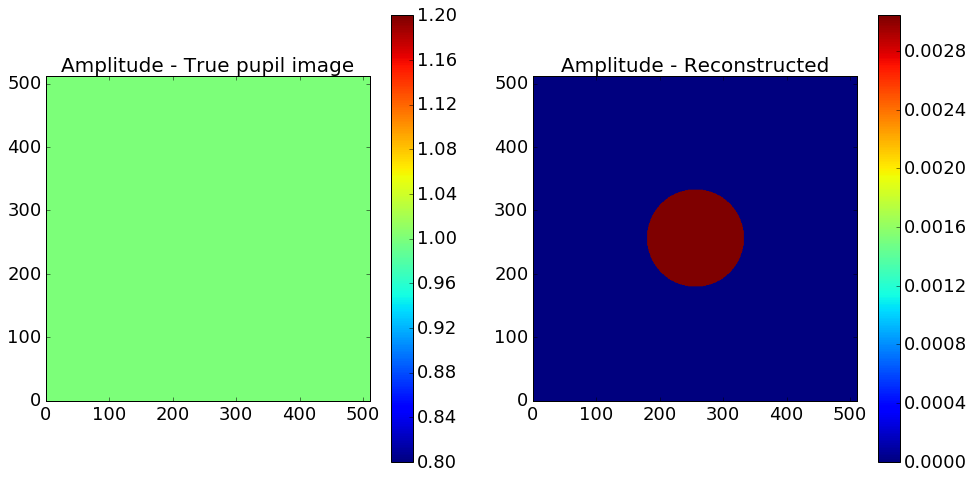

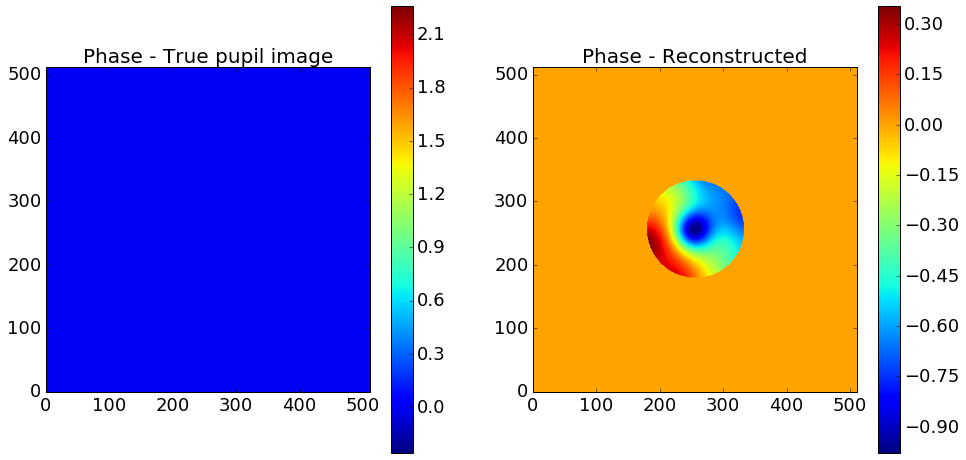

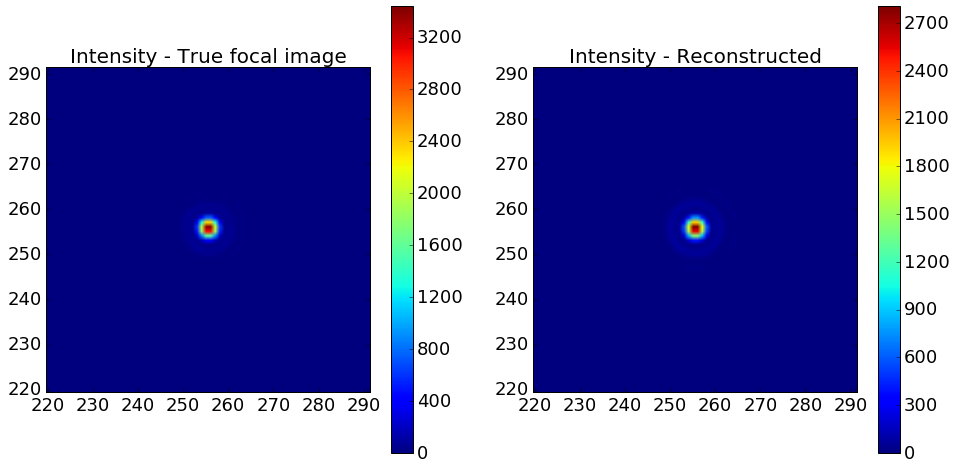

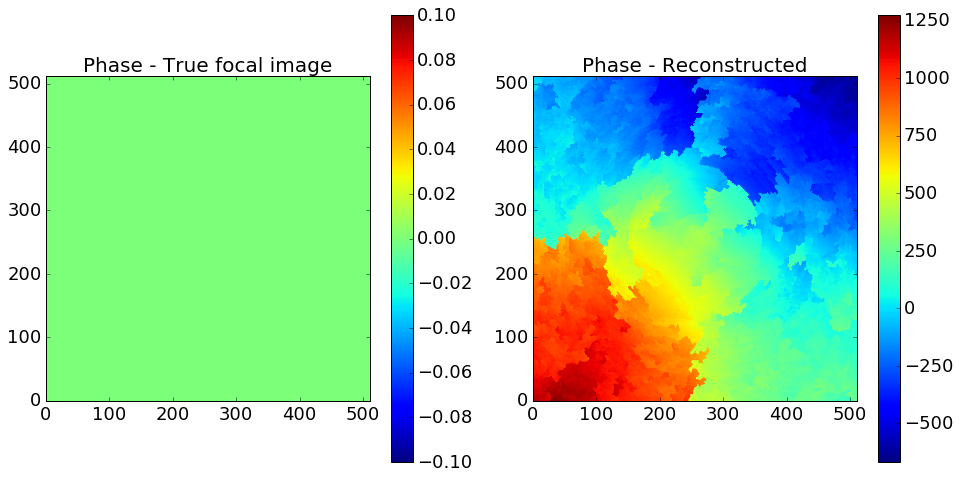

In [94]:
plot_recon(np.ones((Npix,Npix)),np.sqrt(no_aber_PR.foc),no_aber_pup_proj,no_aber_foc)

The PSF is reproduced SUPER detailed... though it seems not "no-aberration" at all.

#### 2. Plus 300nm

In [123]:
plus_300_PR = PR(foc=plus_300_clp,oversamp=oversamp)

Down-sampled array dimension is not even: 153 pix
 Changed to nearest oversamp: 1.66 that gives even-sized arrays


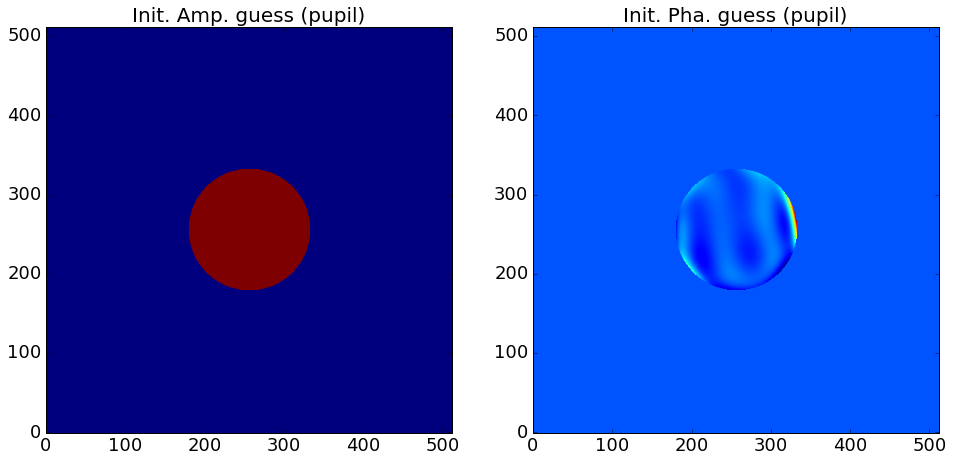

Current filter:


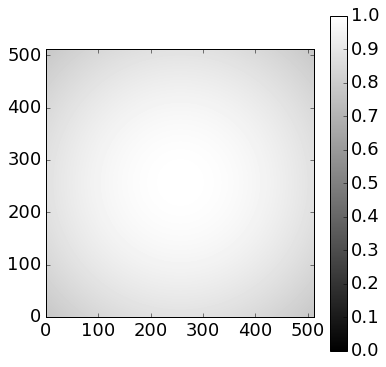

Current iter. : 100
        Error : 3.28e-02
Current iter. : 200
        Error : 3.28e-02
Current filter:


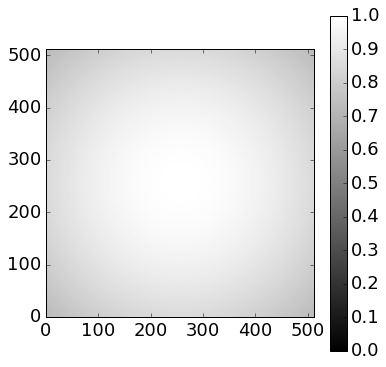

Current iter. : 300
        Error : 3.28e-02
Current iter. : 400
        Error : 3.28e-02
Current filter:


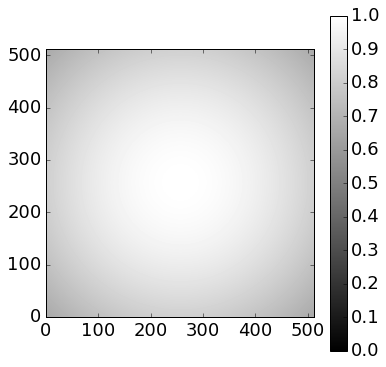

Current iter. : 500
        Error : 3.28e-02
Current iter. : 600
        Error : 3.28e-02
Current filter:


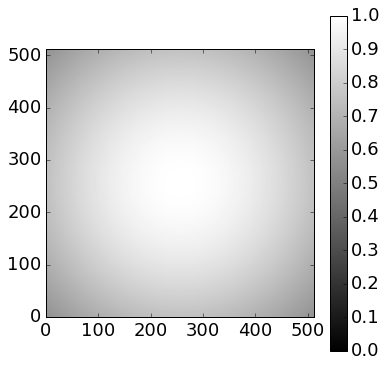

Current iter. : 700
        Error : 3.28e-02
Current iter. : 800
        Error : 3.28e-02
Current filter:


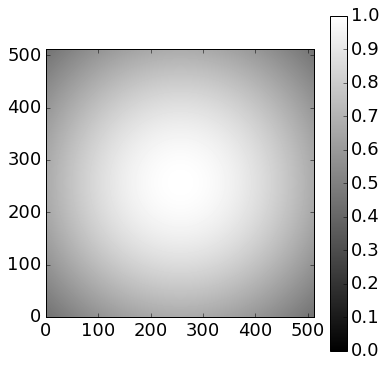

Current iter. : 900
        Error : 3.28e-02
Current iter. : 1000
        Error : 3.28e-02
Current filter:


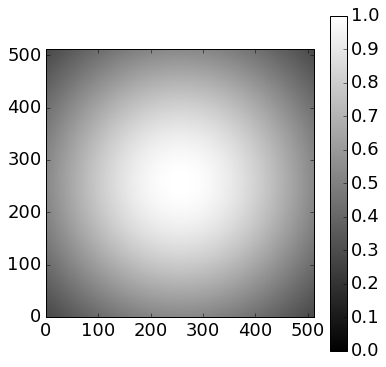

Current iter. : 1100
        Error : 3.28e-02
Current iter. : 1200
        Error : 3.28e-02
Current filter:


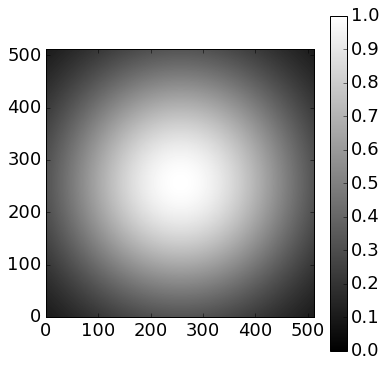

Current iter. : 1300
        Error : 3.28e-02
Current iter. : 1400
        Error : 3.28e-02
Current filter:


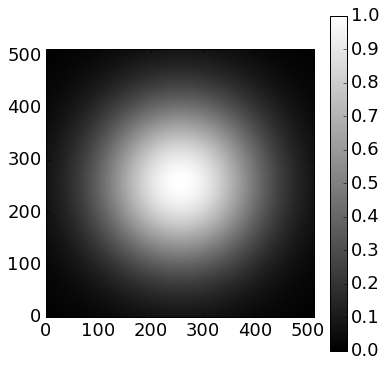

Current iter. : 1500
        Error : 3.28e-02
Current iter. : 1600
        Error : 3.28e-02
Current filter:


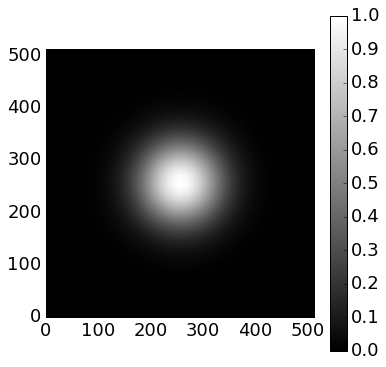

Current iter. : 1700
        Error : 3.28e-02
Current iter. : 1800
        Error : 3.28e-02
Current filter:


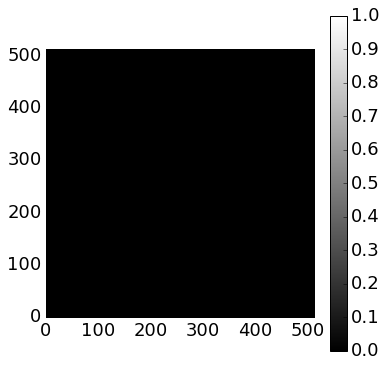

Current iter. : 1900
        Error : 3.28e-02
Current iter. : 2000
        Error : 3.28e-02
-----------------------
First iteration error: 8.40e-02
Final iteration : 2000
Final Error: 3.28e-02


In [96]:
plus_300_pup,plus_300_foc, \
plus_300_errlist, \
plus_300_pup_proj, \
plus_300_errpuplist = plus_300_PR.OSS(beta=0.5,force_only_phase=True,init='random')

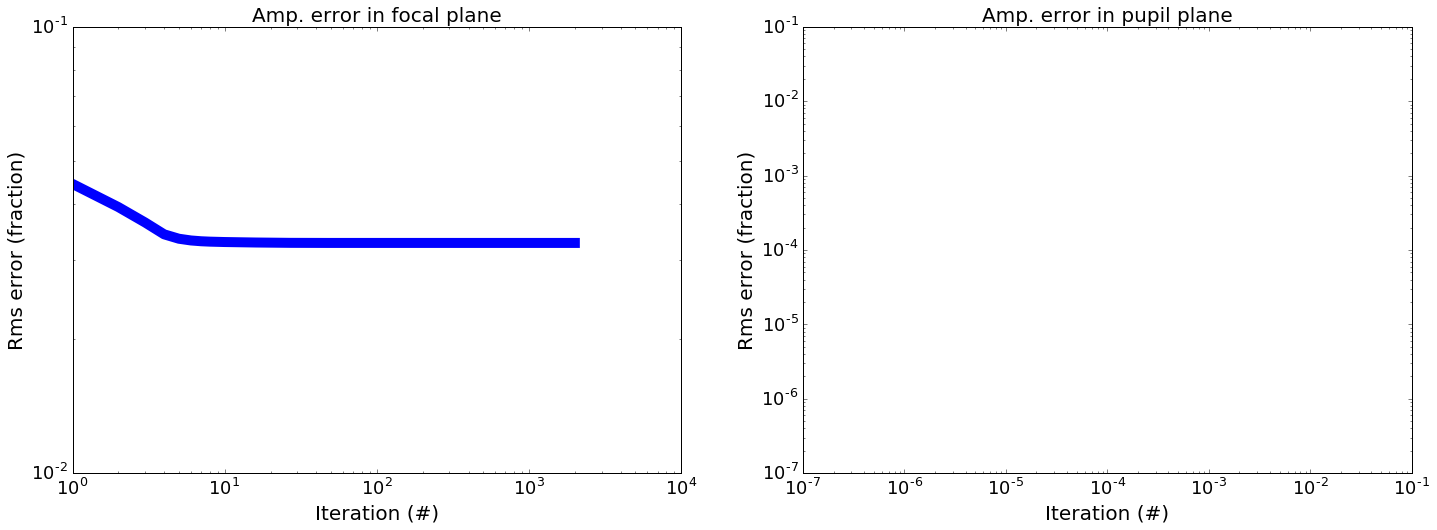

In [97]:
plot_errlist(plus_300_errlist,plus_300_errpuplist)

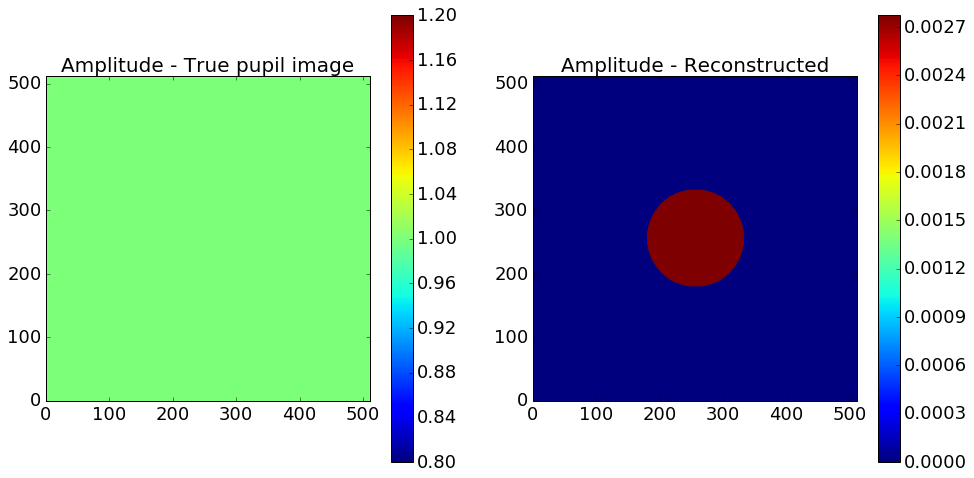

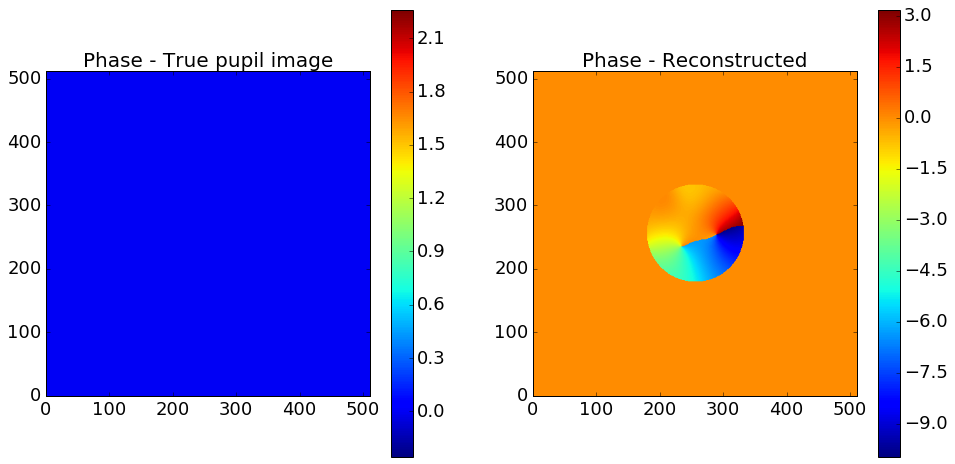

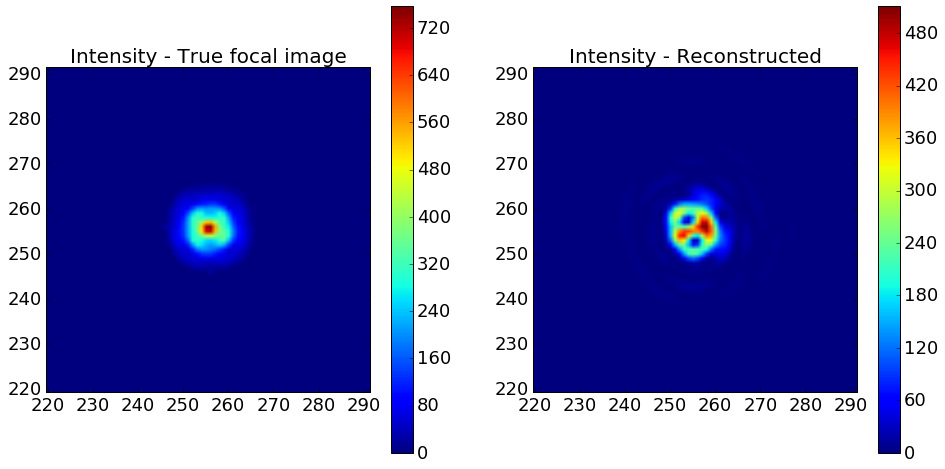

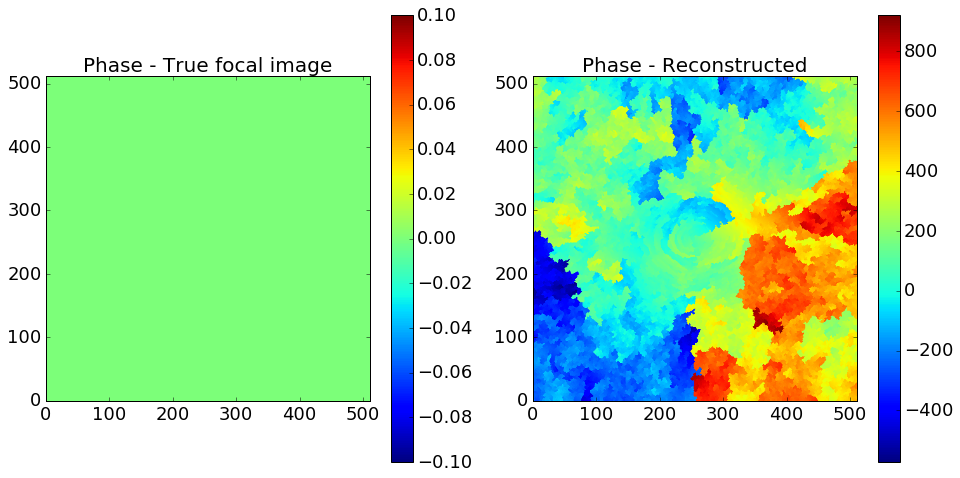

In [124]:
plot_recon(np.ones((Npix,Npix)),np.sqrt(plus_300_PR.foc),plus_300_pup_proj,plus_300_foc)

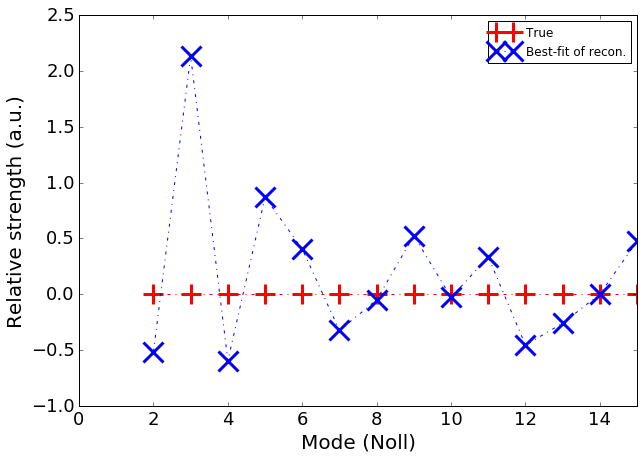

In [99]:
coef_plus_300_true, \
coef_plus_300_reco = wrap_up_zern_fit(plus_300_PR,
                                      Recon_phasor=plus_300_pup_proj,
                                      P_phasor=np.zeros((512,512)),
                                      oversamp=1.66)

:P The window size might be too small. But the artifacts are more suspected

#### 3. Ast. 150nm

In [100]:
ast_150_PR = PR(foc=ast_150_clp,oversamp=oversamp)

Down-sampled array dimension is not even: 153 pix
 Changed to nearest oversamp: 1.66 that gives even-sized arrays


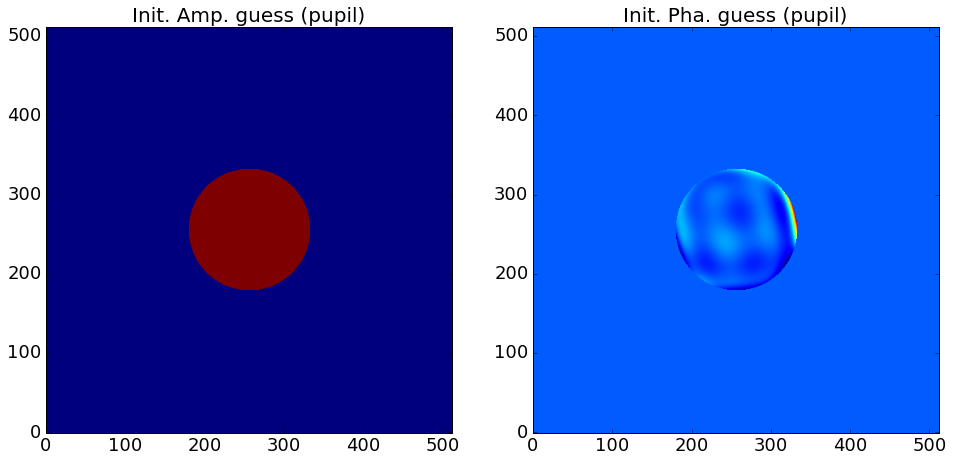

Current filter:


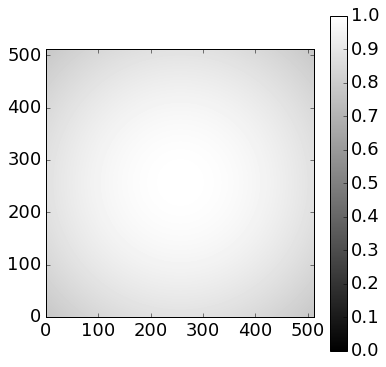

Current iter. : 100
        Error : 2.76e-02
Current iter. : 200
        Error : 2.76e-02
Current filter:


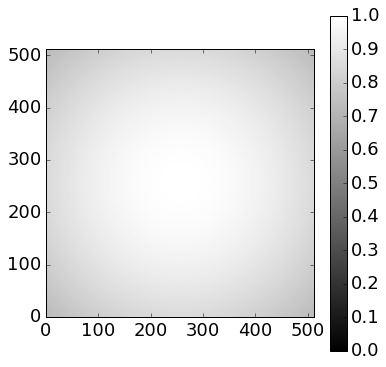

Current iter. : 300
        Error : 2.76e-02
Current iter. : 400
        Error : 2.76e-02
Current filter:


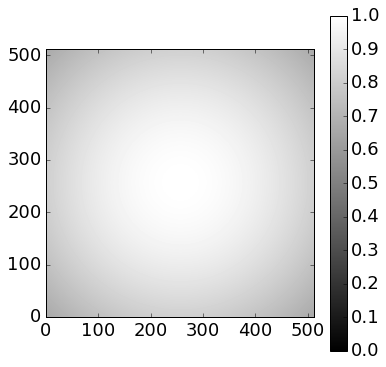

Current iter. : 500
        Error : 2.76e-02
Current iter. : 600
        Error : 2.76e-02
Current filter:


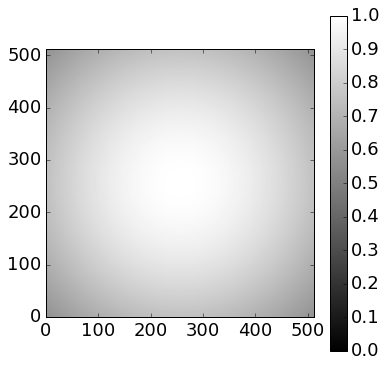

Current iter. : 700
        Error : 2.76e-02
Current iter. : 800
        Error : 2.76e-02
Current filter:


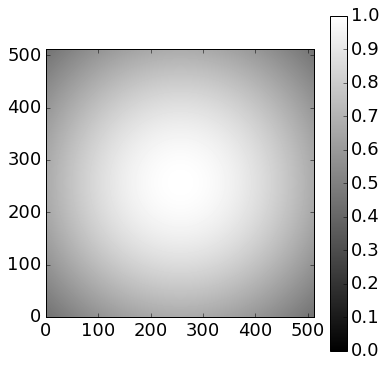

Current iter. : 900
        Error : 2.76e-02
Current iter. : 1000
        Error : 2.76e-02
Current filter:


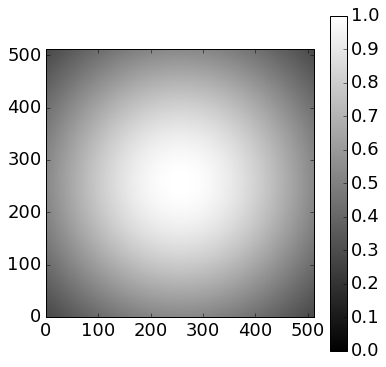

Current iter. : 1100
        Error : 2.76e-02
Current iter. : 1200
        Error : 2.76e-02
Current filter:


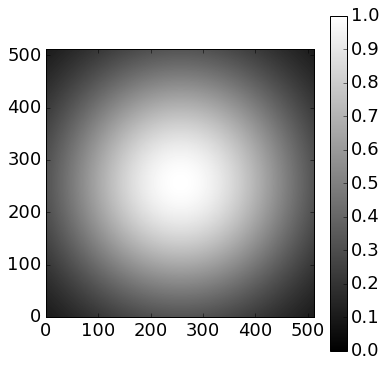

Current iter. : 1300
        Error : 2.76e-02
Current iter. : 1400
        Error : 2.76e-02
Current filter:


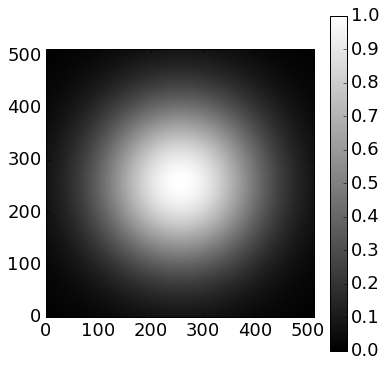

Current iter. : 1500
        Error : 2.76e-02
Current iter. : 1600
        Error : 2.76e-02
Current filter:


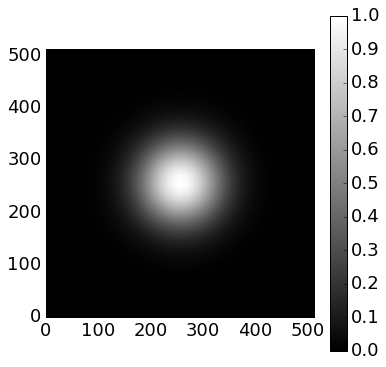

Current iter. : 1700
        Error : 2.76e-02
Current iter. : 1800
        Error : 2.76e-02
Current filter:


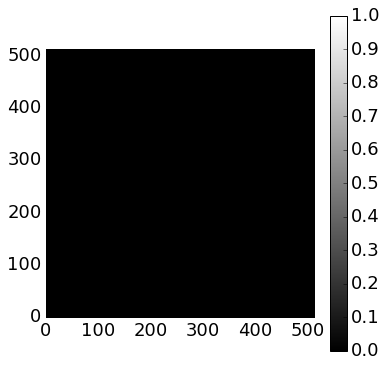

Current iter. : 1900
        Error : 2.76e-02
Current iter. : 2000
        Error : 2.76e-02
-----------------------
First iteration error: 9.45e-02
Final iteration : 2000
Final Error: 2.76e-02


In [101]:
ast_150_pup,ast_150_foc, \
ast_150_errlist, \
ast_150_pup_proj, \
ast_150_errpuplist = ast_150_PR.OSS(beta=0.5,force_only_phase=True,init='random')

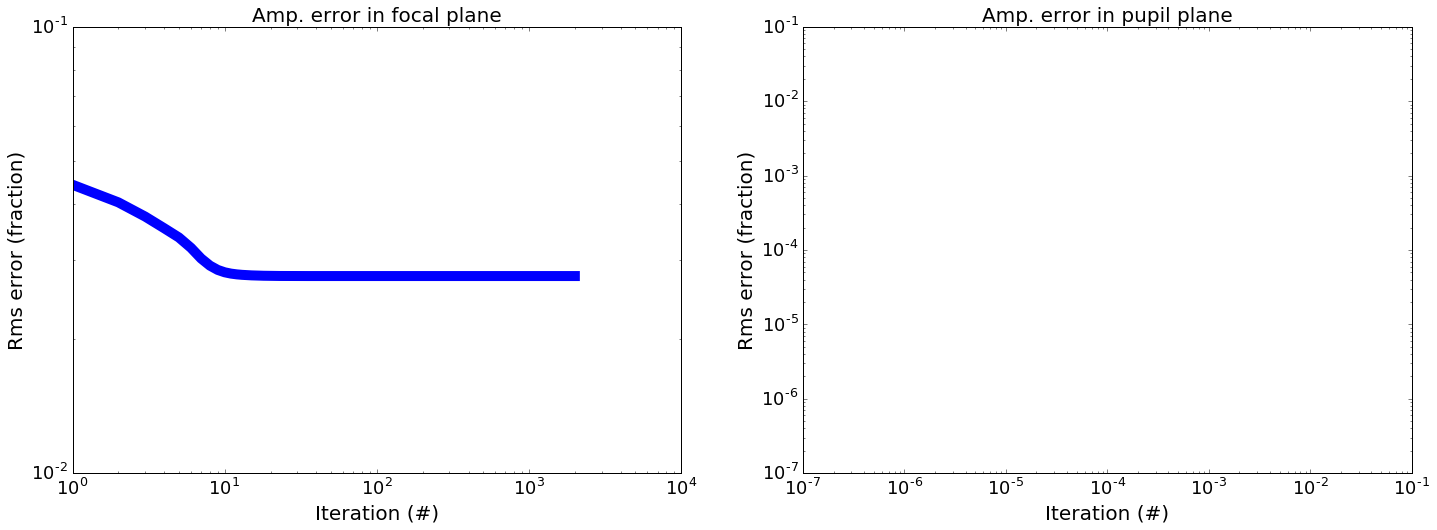

In [102]:
plot_errlist(ast_150_errlist,ast_150_errpuplist)

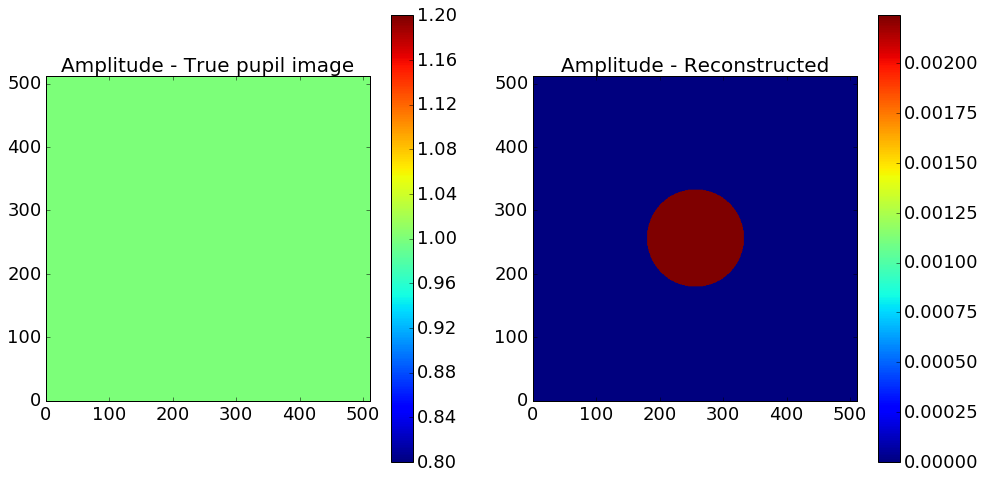

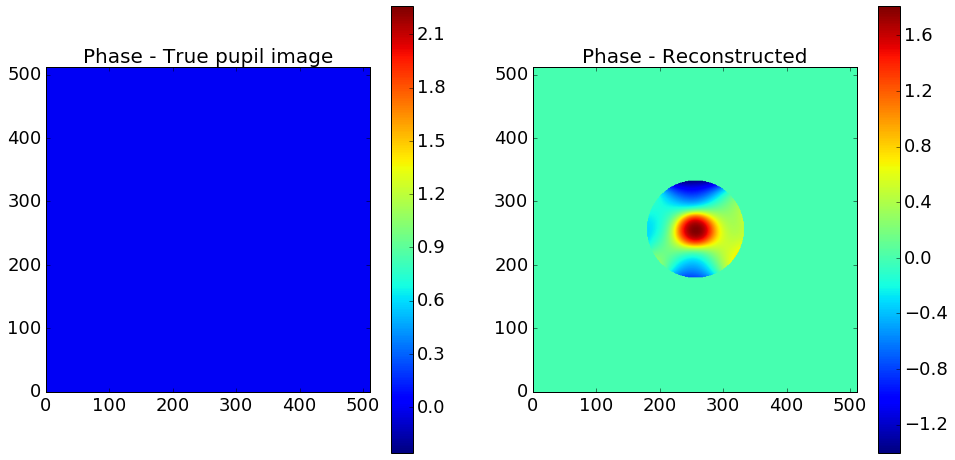

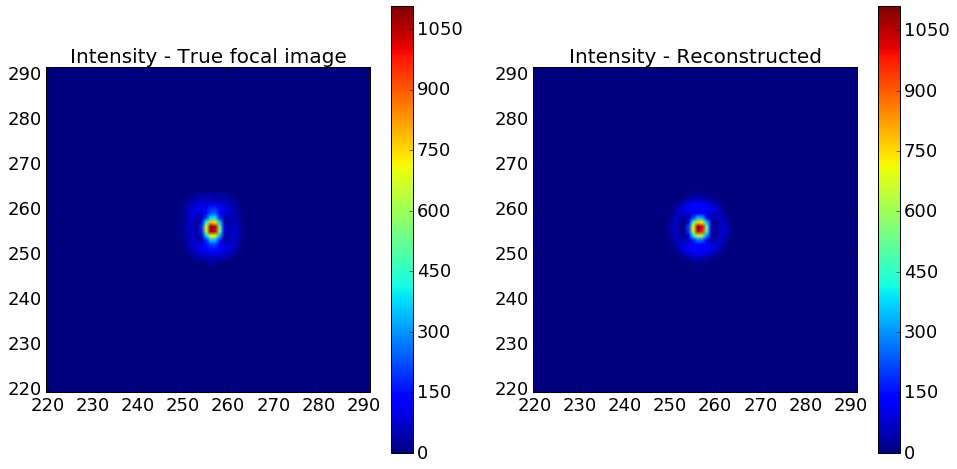

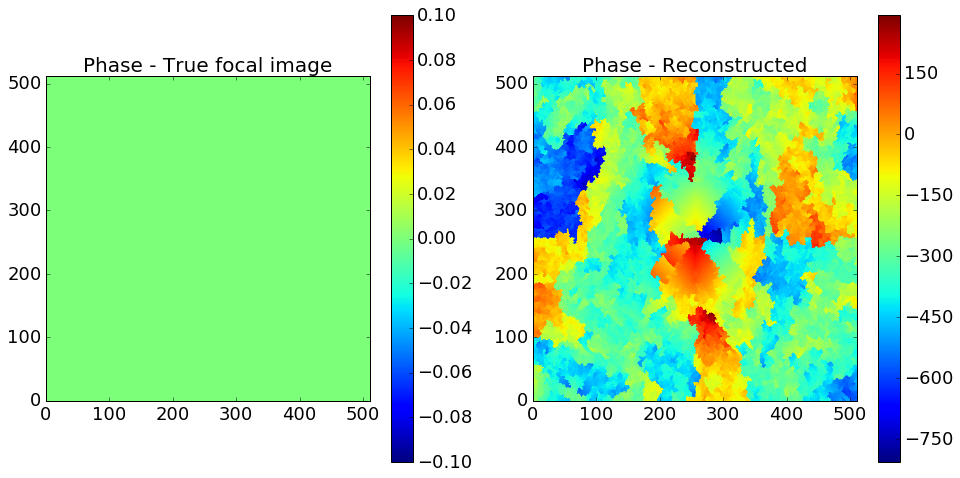

In [103]:
plot_recon(np.ones((Npix,Npix)),np.sqrt(ast_150_PR.foc),ast_150_pup_proj,ast_150_foc)

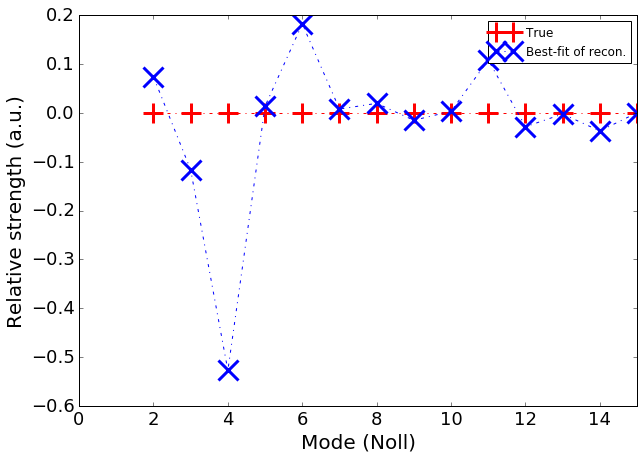

In [104]:
coef_ast_150_true, \
coef_ast_150_reco = wrap_up_zern_fit(ast_150_PR,
                                     Recon_phasor=ast_150_pup_proj,
                                     P_phasor=np.zeros((512,512)),
                                     oversamp=1.66)

Good. We know the data was generated from 150nm focus and 150nm astigmatism!

#### 4. Ast. 50nm only

In [155]:
ast_50_PR = PR(foc=ast_50_clp,oversamp=oversamp)

Down-sampled array dimension is not even: 153 pix
 Changed to nearest oversamp: 1.66 that gives even-sized arrays


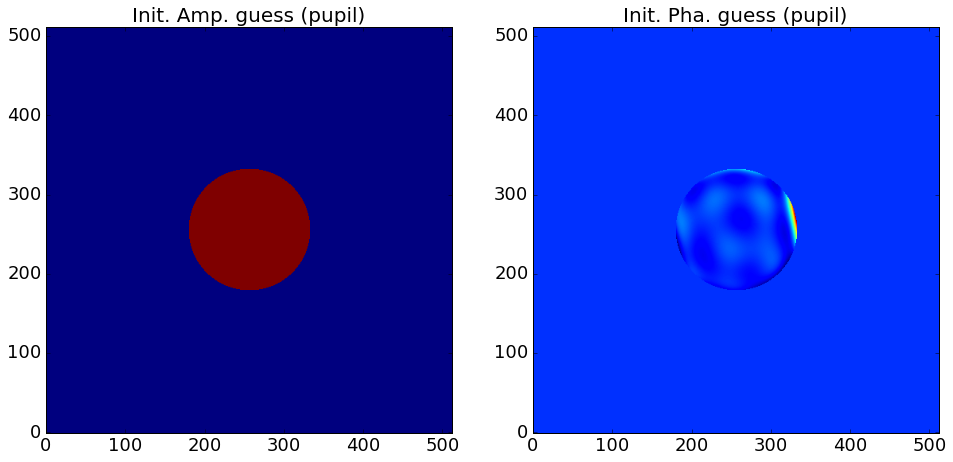

Current filter:


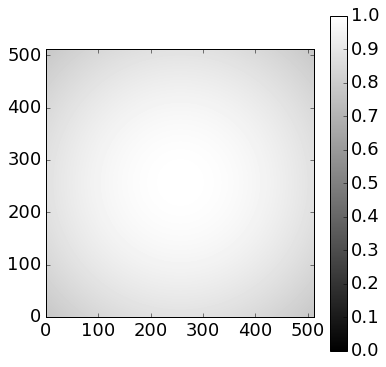

Current iter. : 100
        Error : 2.73e-02
Current iter. : 200
        Error : 2.73e-02
Current filter:


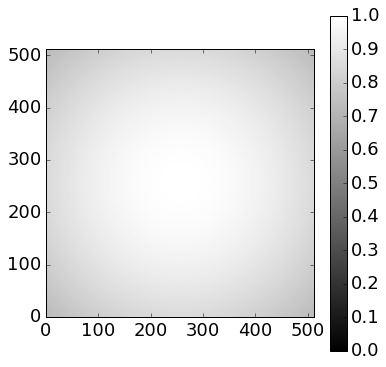

Current iter. : 300
        Error : 2.73e-02
Current iter. : 400
        Error : 2.73e-02
Current filter:


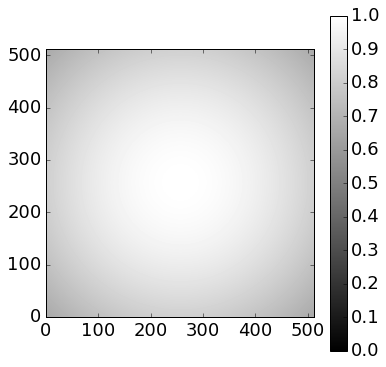

Current iter. : 500
        Error : 2.73e-02
Current iter. : 600
        Error : 2.73e-02
Current filter:


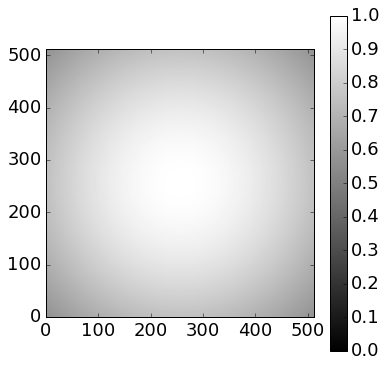

Current iter. : 700
        Error : 2.73e-02
Current iter. : 800
        Error : 2.73e-02
Current filter:


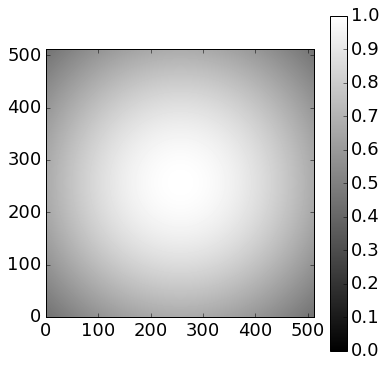

Current iter. : 900
        Error : 2.73e-02
Current iter. : 1000
        Error : 2.73e-02
Current filter:


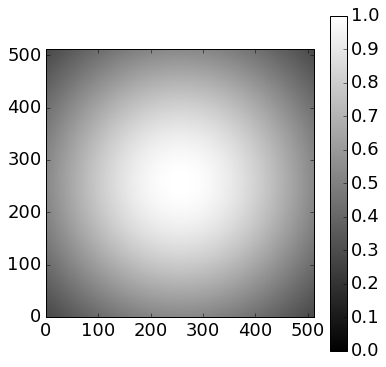

Current iter. : 1100
        Error : 2.73e-02
Current iter. : 1200
        Error : 2.73e-02
Current filter:


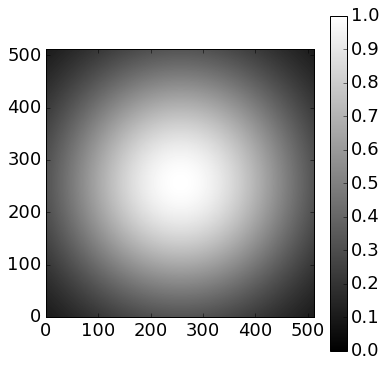

Current iter. : 1300
        Error : 2.73e-02
Current iter. : 1400
        Error : 2.73e-02
Current filter:


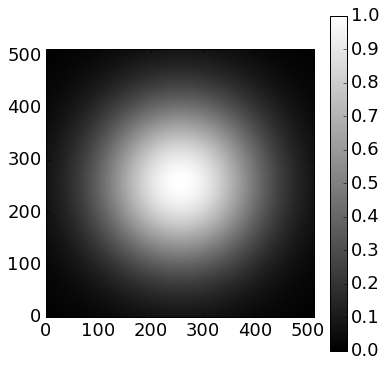

Current iter. : 1500
        Error : 2.73e-02
Current iter. : 1600
        Error : 2.73e-02
Current filter:


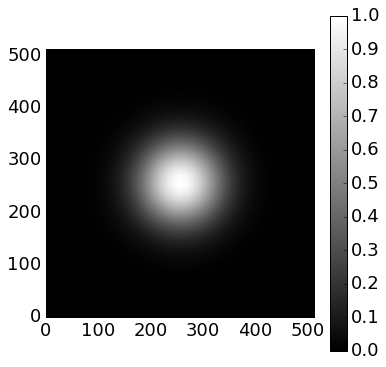

Current iter. : 1700
        Error : 2.73e-02
Current iter. : 1800
        Error : 2.73e-02
Current filter:


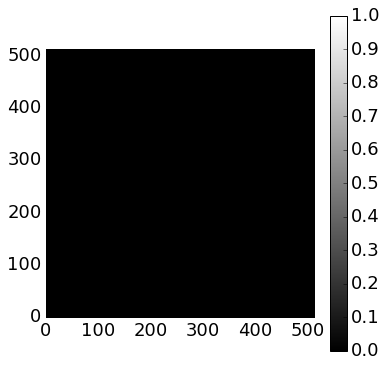

Current iter. : 1900
        Error : 2.73e-02
Current iter. : 2000
        Error : 2.73e-02
-----------------------
First iteration error: 1.20e-01
Final iteration : 2000
Final Error: 2.73e-02


In [156]:
ast_50_pup,ast_50_foc, \
ast_50_errlist, \
ast_50_pup_proj, \
ast_50_errpuplist = ast_50_PR.OSS(beta=0.5,force_only_phase=True,init='random')

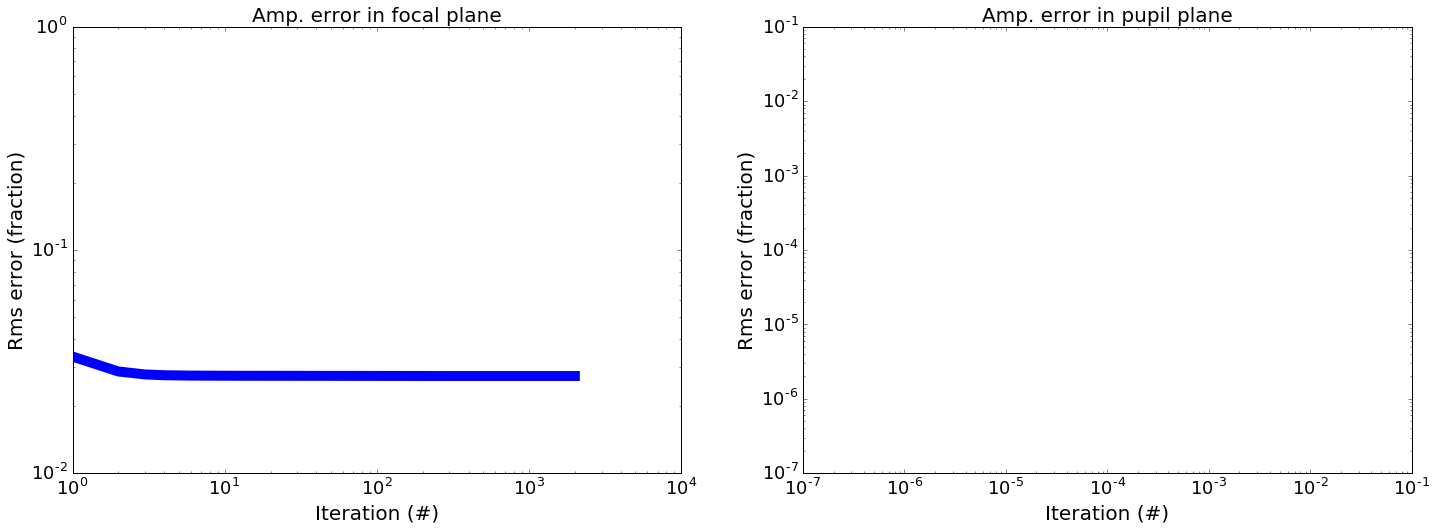

In [157]:
plot_errlist(ast_50_errlist,ast_50_errpuplist)

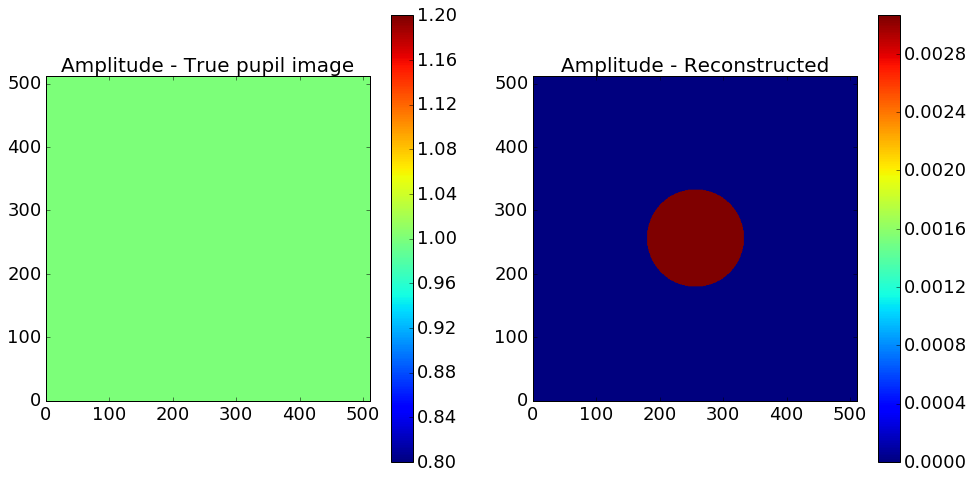

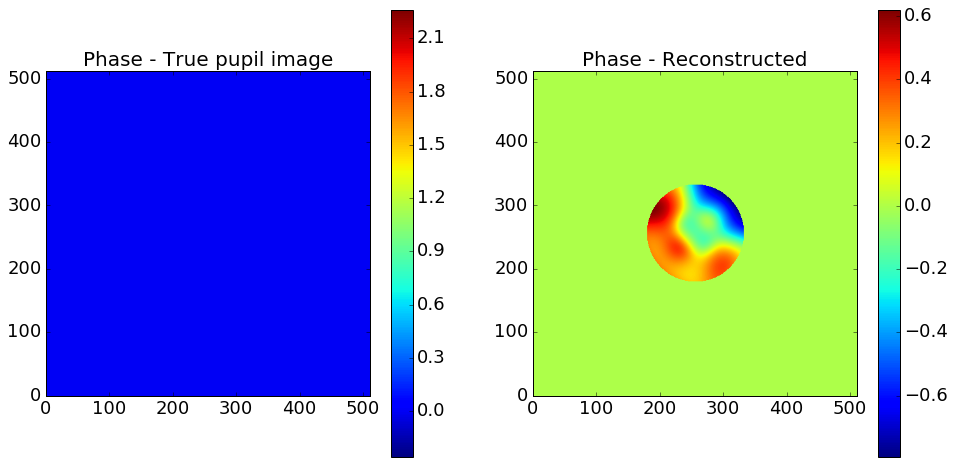

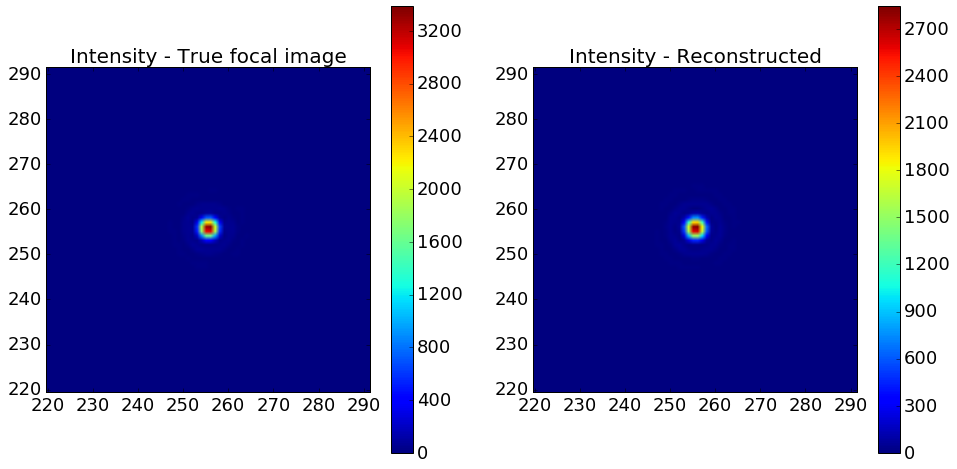

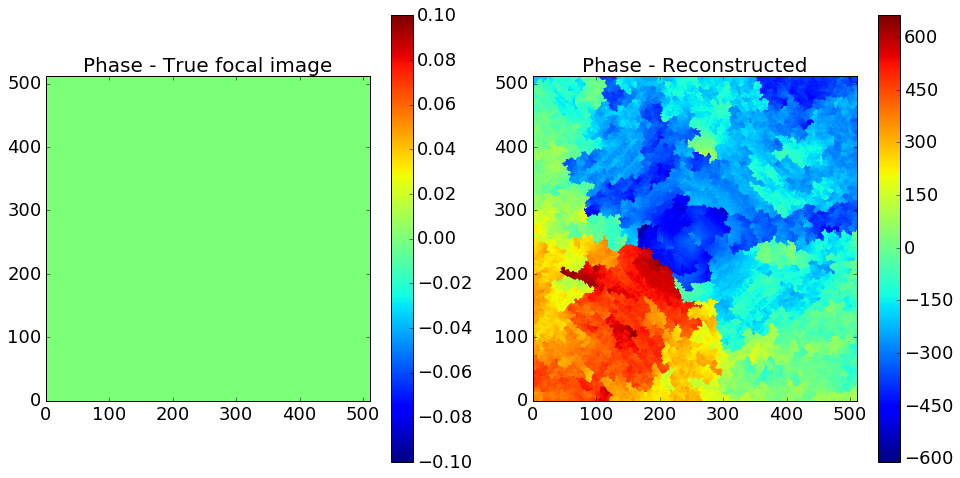

In [158]:
plot_recon(np.ones((Npix,Npix)),np.sqrt(ast_50_PR.foc),ast_50_pup_proj,ast_50_foc)

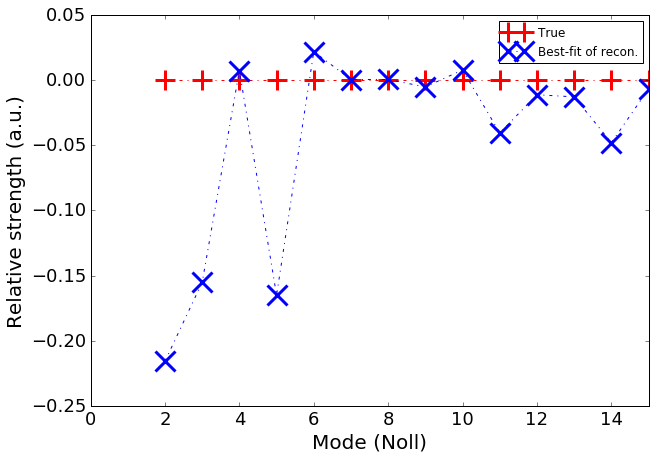

In [159]:
coef_ast_50_true, \
coef_ast_50_reco = wrap_up_zern_fit(ast_50_PR,
                                    Recon_phasor=ast_50_pup_proj,
                                    P_phasor=np.zeros((512,512)),
                                    oversamp=1.66)

Could there still be ambiguity in orientation? Say it was actually rotated 90+24.4 degrees?

#### 5. Complex

In [160]:
complex1_PR = PR(foc=complex1_clp,oversamp=oversamp)

Down-sampled array dimension is not even: 153 pix
 Changed to nearest oversamp: 1.66 that gives even-sized arrays


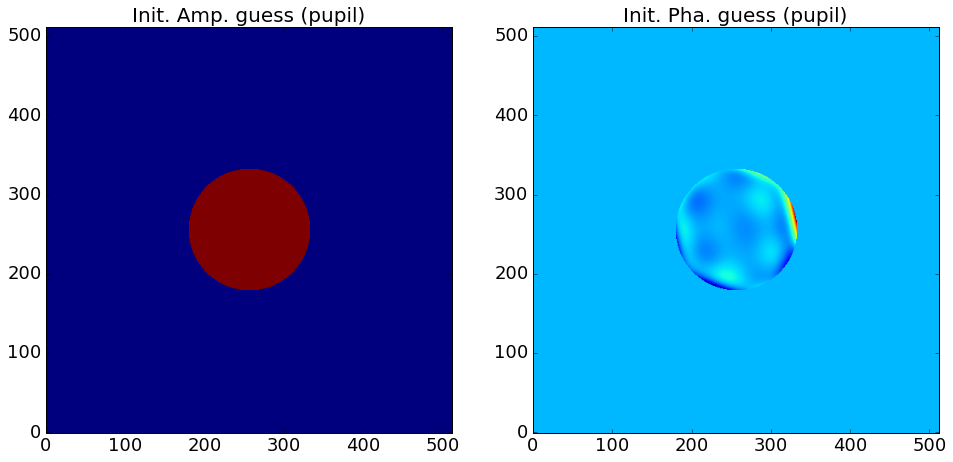

Current filter:


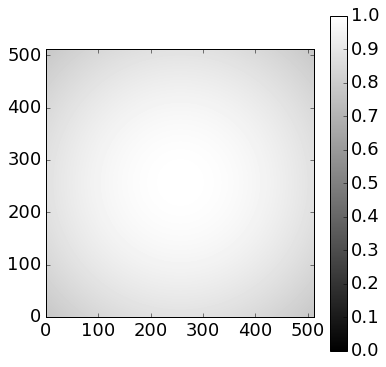

Current iter. : 100
        Error : 2.37e-02
Current iter. : 200
        Error : 2.37e-02
Current filter:


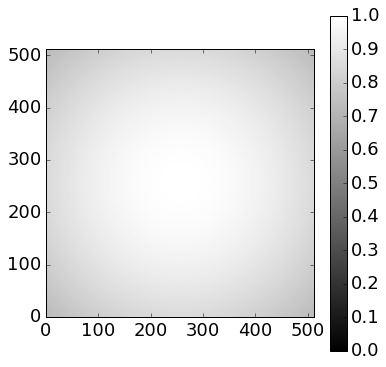

Current iter. : 300
        Error : 2.37e-02
Current iter. : 400
        Error : 2.37e-02
Current filter:


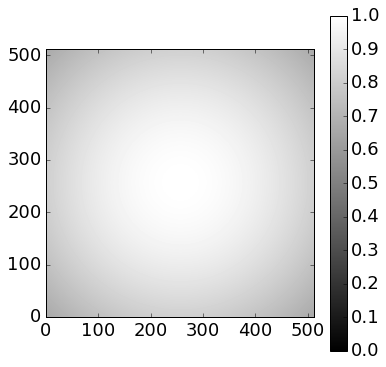

Current iter. : 500
        Error : 2.37e-02
Current iter. : 600
        Error : 2.37e-02
Current filter:


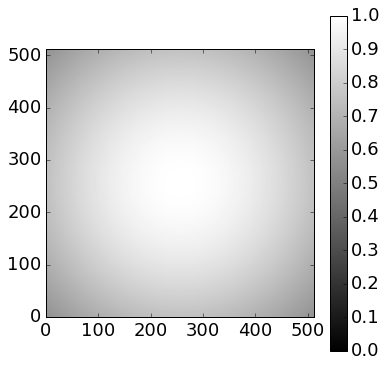

Current iter. : 700
        Error : 2.37e-02
Current iter. : 800
        Error : 2.37e-02
Current filter:


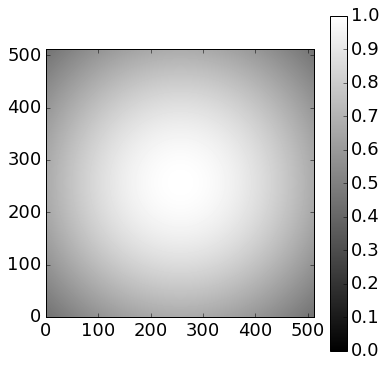

Current iter. : 900
        Error : 2.37e-02
Current iter. : 1000
        Error : 2.37e-02
Current filter:


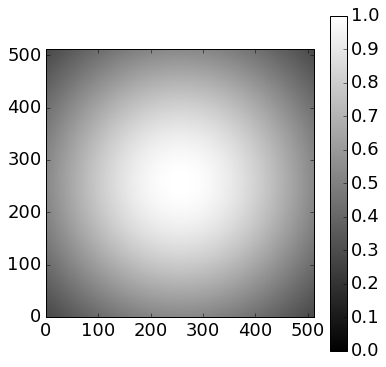

Current iter. : 1100
        Error : 2.37e-02
Current iter. : 1200
        Error : 2.37e-02
Current filter:


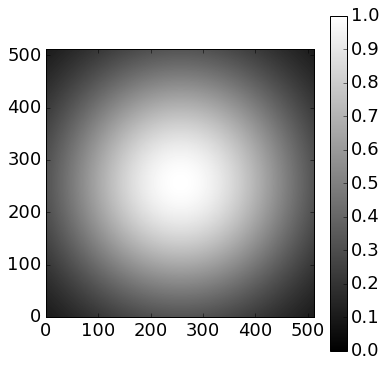

Current iter. : 1300
        Error : 2.37e-02
Current iter. : 1400
        Error : 2.37e-02
Current filter:


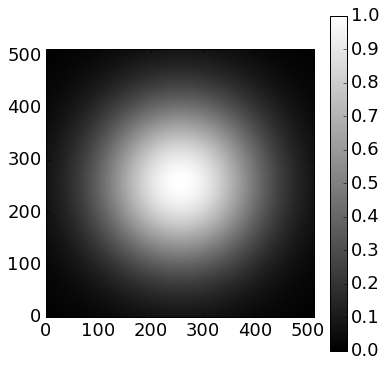

Current iter. : 1500
        Error : 2.37e-02
Current iter. : 1600
        Error : 2.37e-02
Current filter:


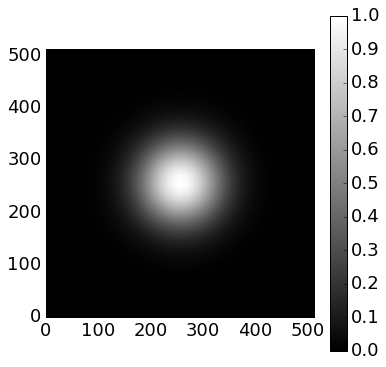

Current iter. : 1700
        Error : 2.37e-02
Current iter. : 1800
        Error : 2.37e-02
Current filter:


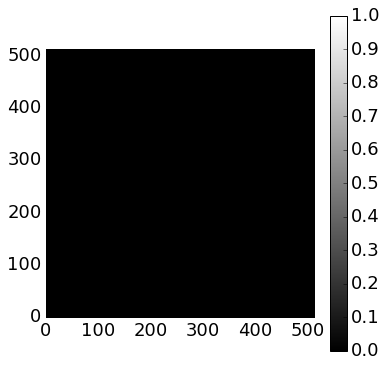

Current iter. : 1900
        Error : 2.37e-02
Current iter. : 2000
        Error : 2.37e-02
-----------------------
First iteration error: 7.72e-02
Final iteration : 2000
Final Error: 2.37e-02


In [161]:
complex1_pup,complex1_foc, \
complex1_errlist, \
complex1_pup_proj, \
complex1_errpuplist = complex1_PR.OSS(beta=0.5,force_only_phase=True,init='random')

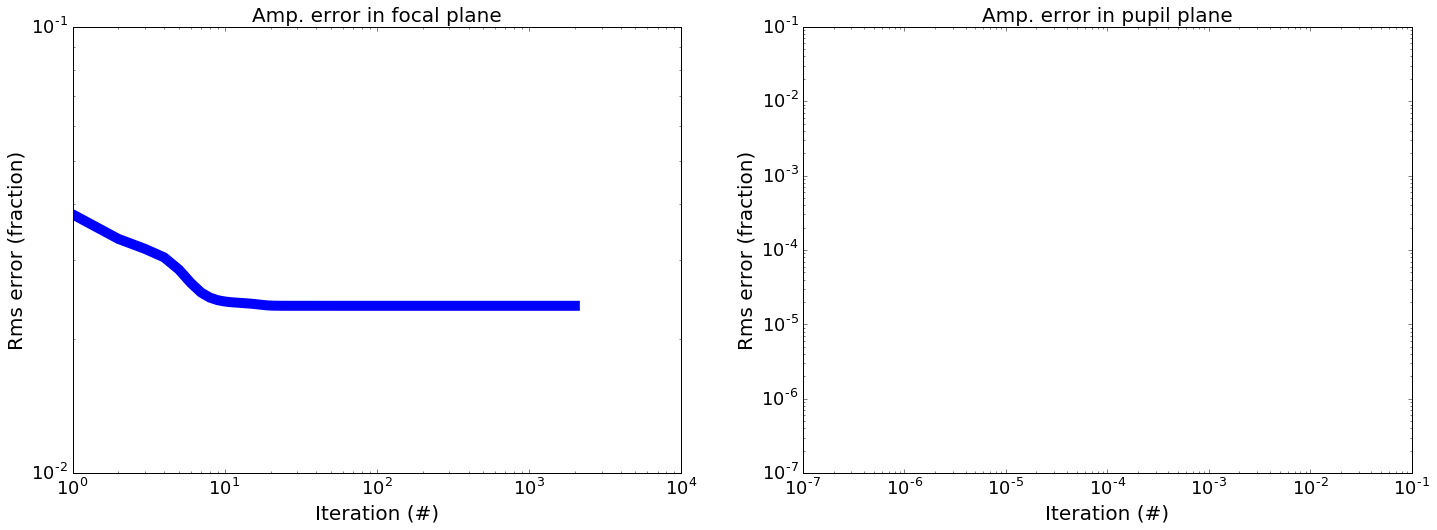

In [162]:
plot_errlist(complex1_errlist,complex1_errpuplist)

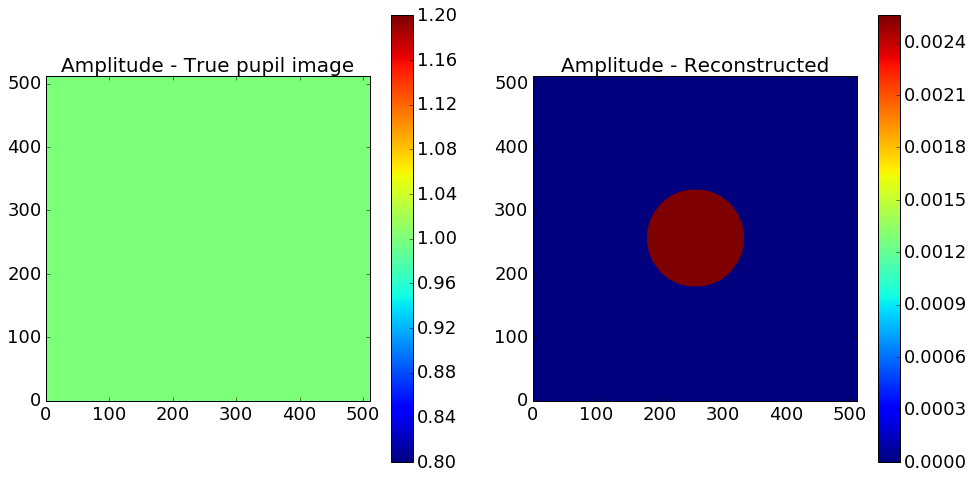

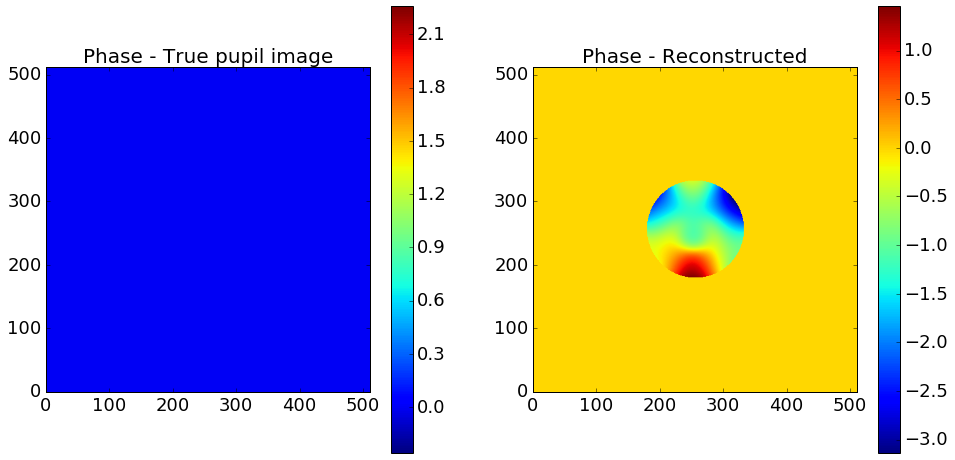

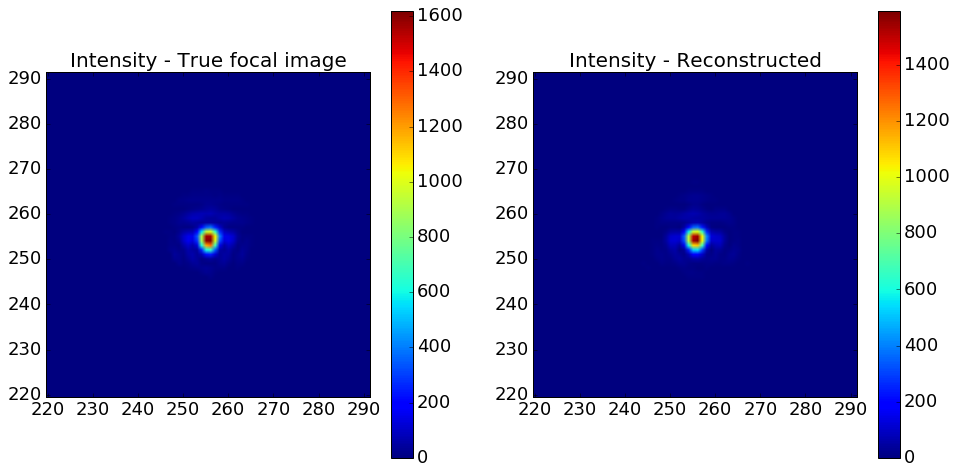

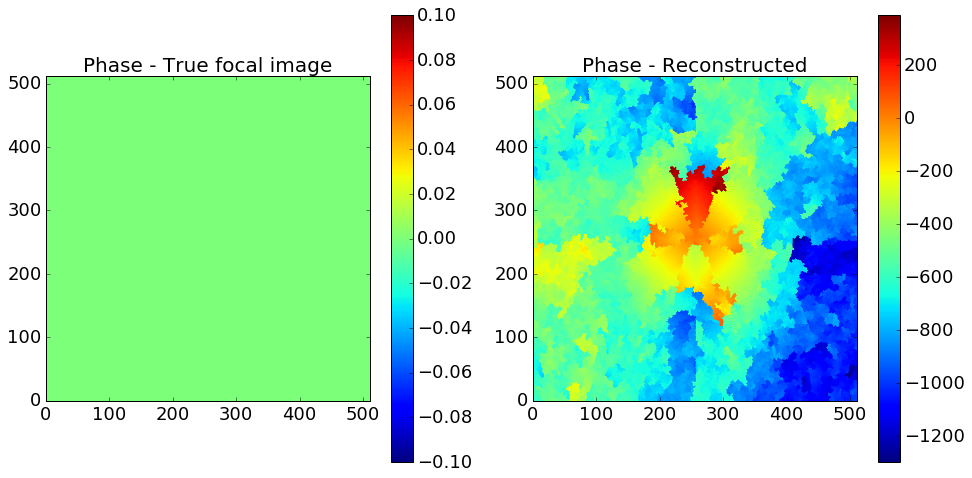

In [163]:
plot_recon(np.ones((Npix,Npix)),np.sqrt(complex1_PR.foc),complex1_pup_proj,complex1_foc)

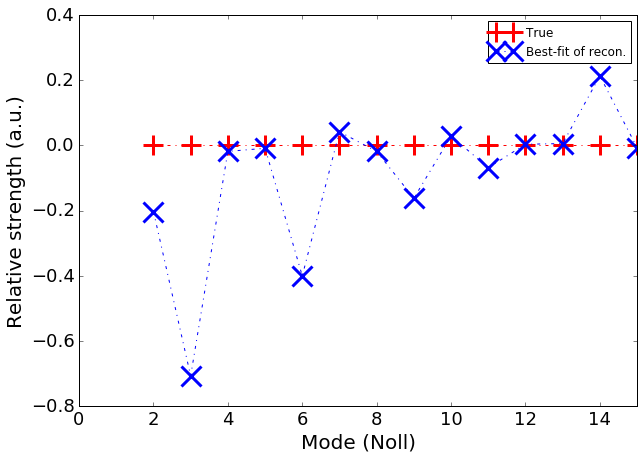

In [164]:
coef_complex1_true, \
coef_complex1_reco = wrap_up_zern_fit(complex1_PR,
                                      Recon_phasor=complex1_pup_proj,
                                      P_phasor=np.zeros((512,512)),
                                      oversamp=1.66)

The "answer" is (Noll#6) +150 astig (2,2), (Noll#8) +150 coma (3,1), (Noll#10) +100 trefoil (3,3), and (Noll#14) +100 quadifoil (4,4). Only partly correct...

### How about the "original" PSFs?
_i.e. without rotation..._

#### Centers

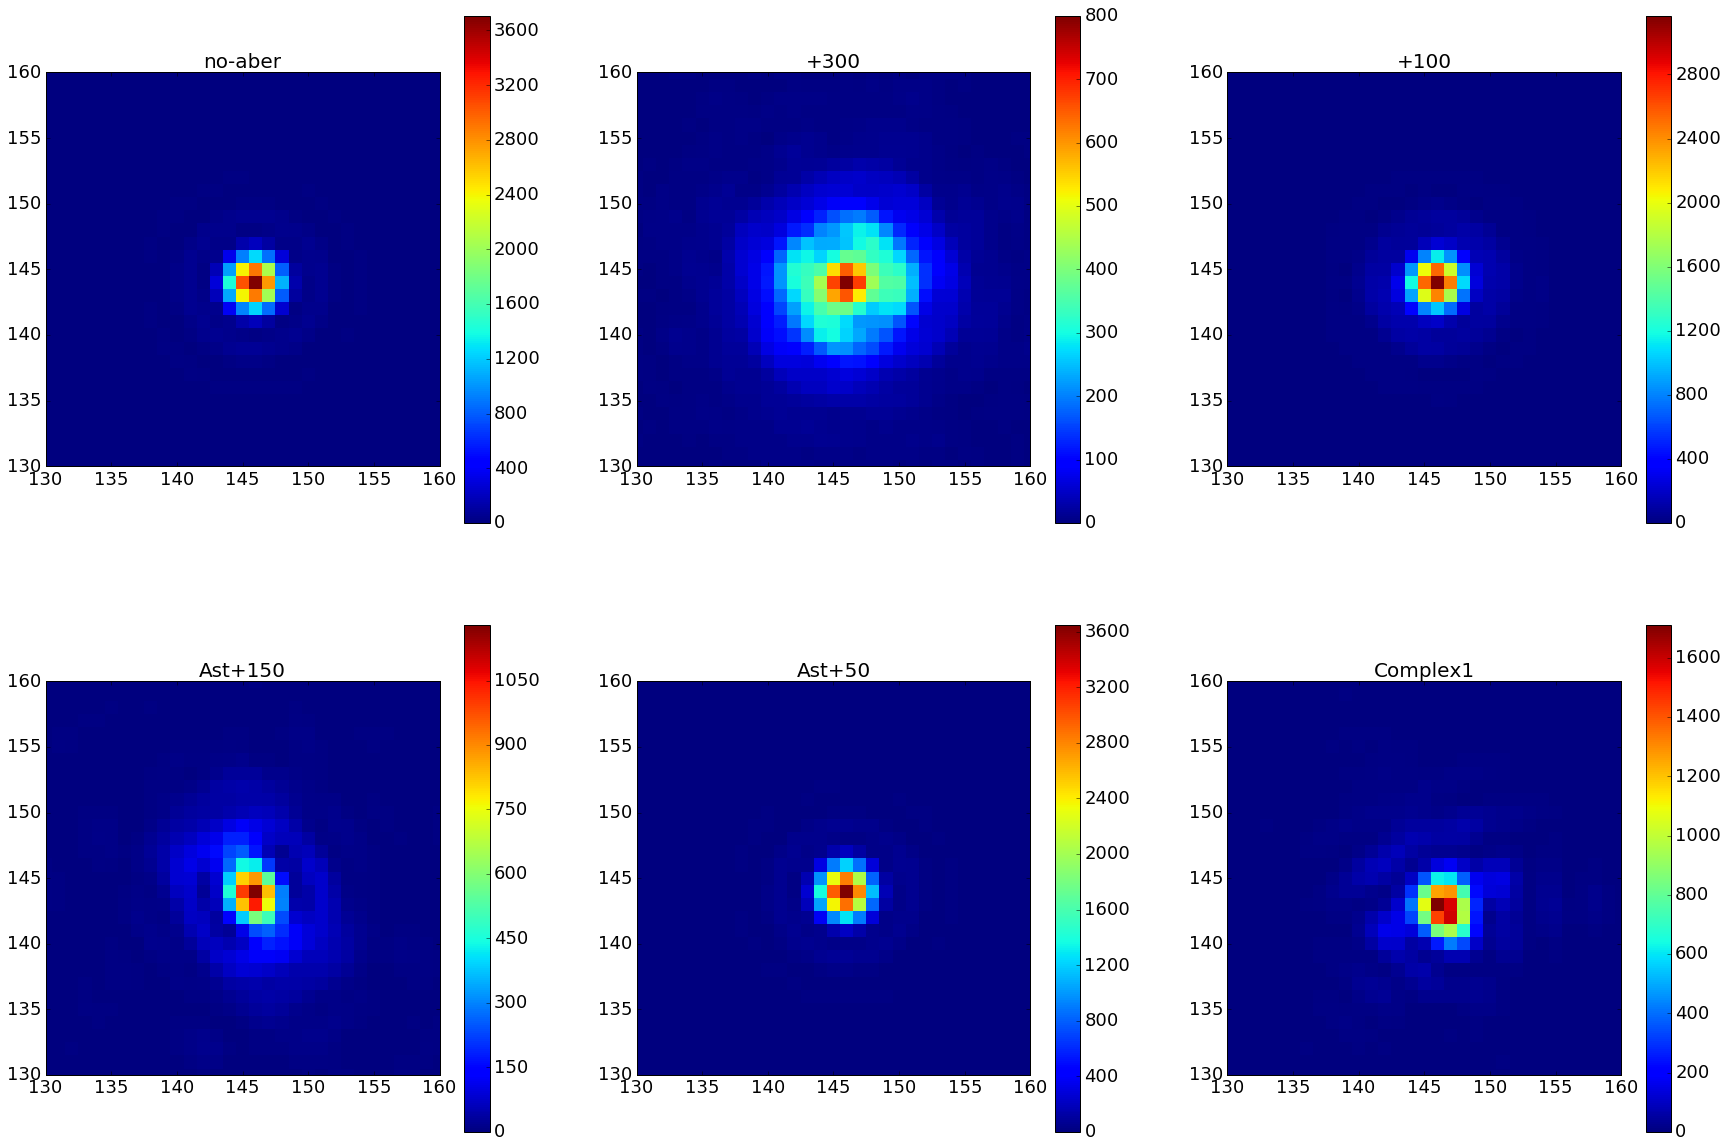

In [167]:
##
plt.figure(figsize=(30,20))
plt.subplot(231); plt.title('no-aber')
plt.imshow(no_aber.data_slc,origin='lower',interpolation='none')
plt.xlim(xlim2); plt.ylim(ylim2); 
plt.colorbar(); plt.clim(0,np.nanmax(no_aber.data_slc))

plt.subplot(232); plt.title('+300')
plt.imshow(plus_300.data_slc,origin='lower',interpolation='none')
plt.xlim(xlim2); plt.ylim(ylim2); 
plt.colorbar(); plt.clim(0,np.nanmax(plus_300.data_slc))

plt.subplot(233); plt.title('+100')
plt.imshow(plus_100.data_slc,origin='lower',interpolation='none')
plt.xlim(xlim2); plt.ylim(ylim2); 
plt.colorbar(); plt.clim(0,np.nanmax(plus_100.data_slc))

plt.subplot(234); plt.title('Ast+150')
plt.imshow(ast_150.data_slc,origin='lower',interpolation='none')
plt.xlim(xlim2); plt.ylim(ylim2); 
plt.colorbar(); plt.clim(0,np.nanmax(ast_150.data_slc))

plt.subplot(235); plt.title('Ast+50')
plt.imshow(ast_50.data_slc,origin='lower',interpolation='none')
plt.xlim(xlim2); plt.ylim(ylim2); 
plt.colorbar(); plt.clim(0,np.nanmax(ast_50.data_slc))

plt.subplot(236); plt.title('Complex1')
plt.imshow(complex1.data_slc,origin='lower',interpolation='none')
plt.xlim(xlim2); plt.ylim(ylim2); 
plt.colorbar(); plt.clim(0,np.nanmax(complex1.data_slc))

I kinda doubt that the +300 is really +300 only... One can clearly see some ast...

In [168]:
size=20
no_aber_ori_clp  = clipping(no_aber.data_slc, Npix=Npix,center=(146,144),size=size)
plus_300_ori_clp = clipping(plus_300.data_slc,Npix=Npix,center=(146,144),size=size)
plus_100_ori_clp = clipping(plus_100.data_slc,Npix=Npix,center=(146,144),size=size)
ast_150_ori_clp  = clipping(ast_150.data_slc, Npix=Npix,center=(146,144),size=size)
ast_50_ori_clp   = clipping(ast_50.data_slc,  Npix=Npix,center=(146,144),size=size)
complex1_ori_clp = clipping(complex1.data_slc,Npix=Npix,center=(146,144),size=size)

(220, 290)

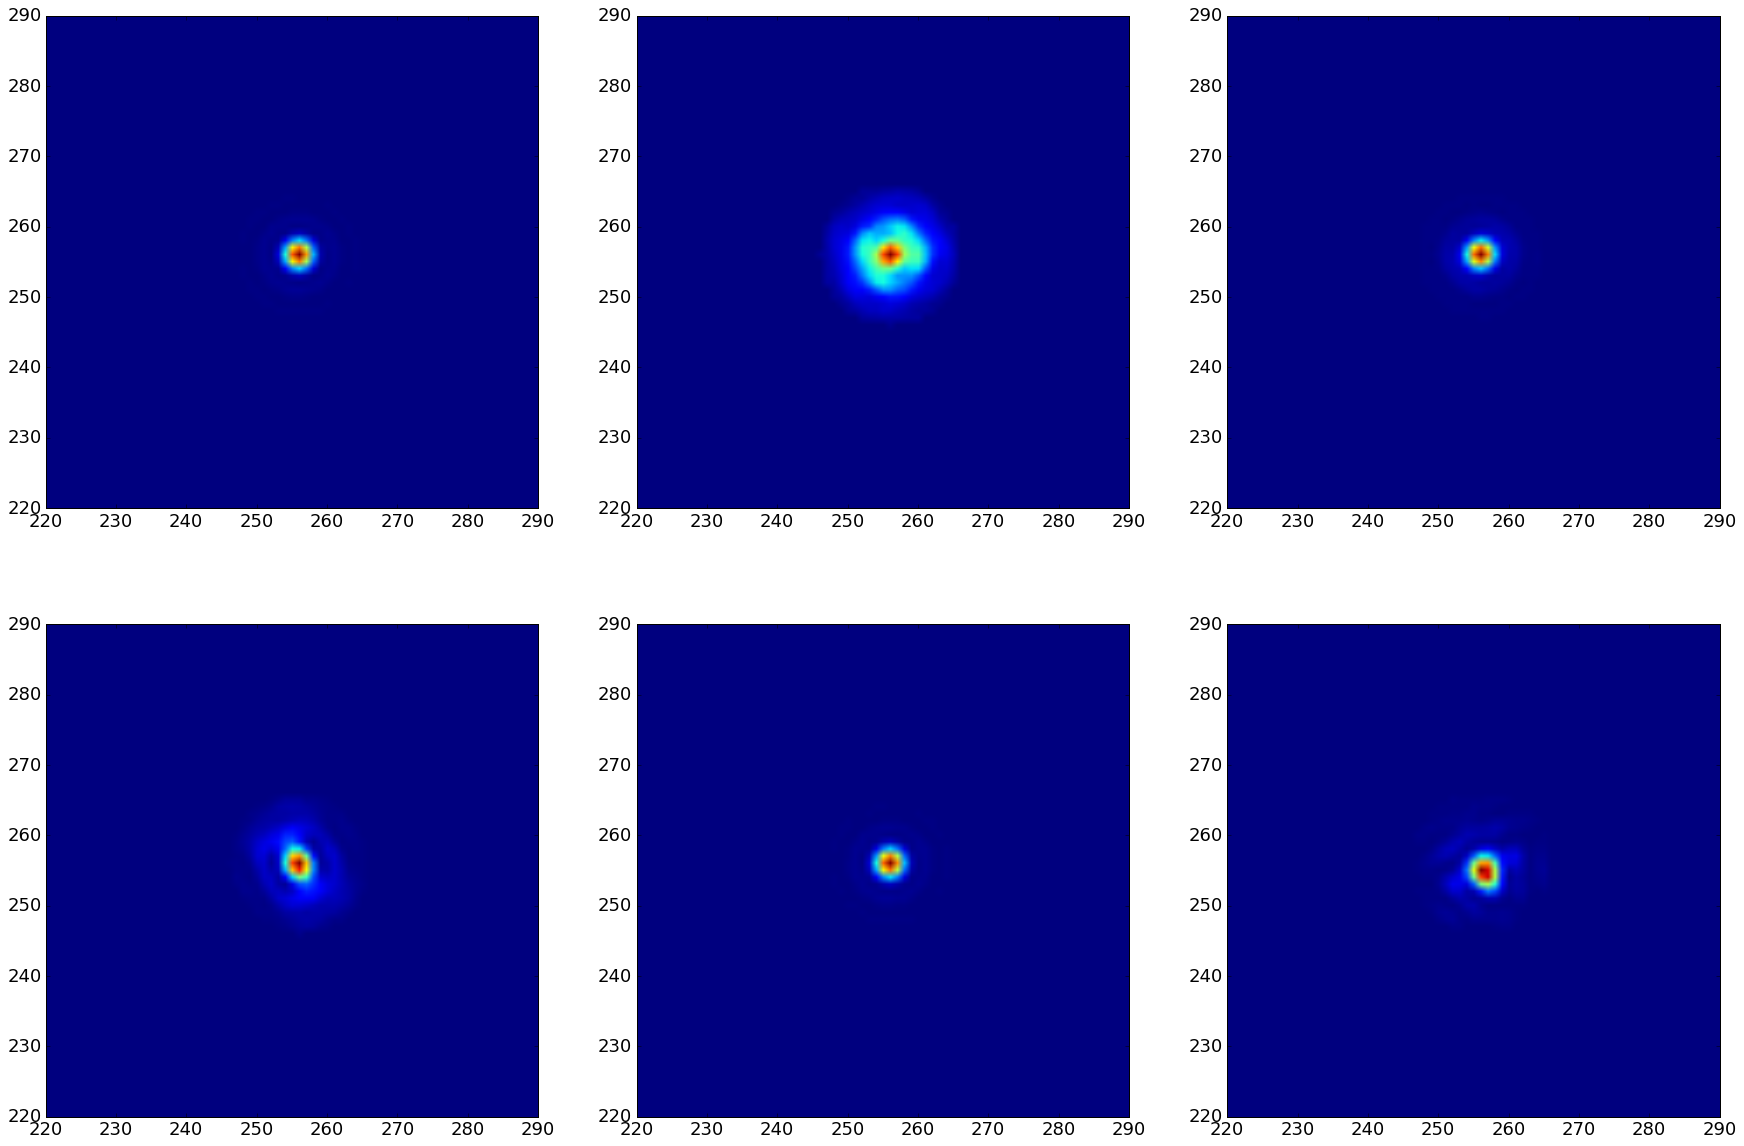

In [169]:
plt.figure(figsize=(30,20))
plt.subplot(231); plt.imshow(no_aber_ori_clp, origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(232); plt.imshow(plus_300_ori_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(233); plt.imshow(plus_100_ori_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(234); plt.imshow(ast_150_ori_clp, origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(235); plt.imshow(ast_50_ori_clp,  origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(236); plt.imshow(complex1_ori_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)

### Then go...
#### 1. no-aber

In [173]:
## assume all images were taken under same condition
oversampo = 3/2.4

## setup
no_aber_ori_PR = PR(foc=no_aber_ori_clp,oversamp=oversampo)

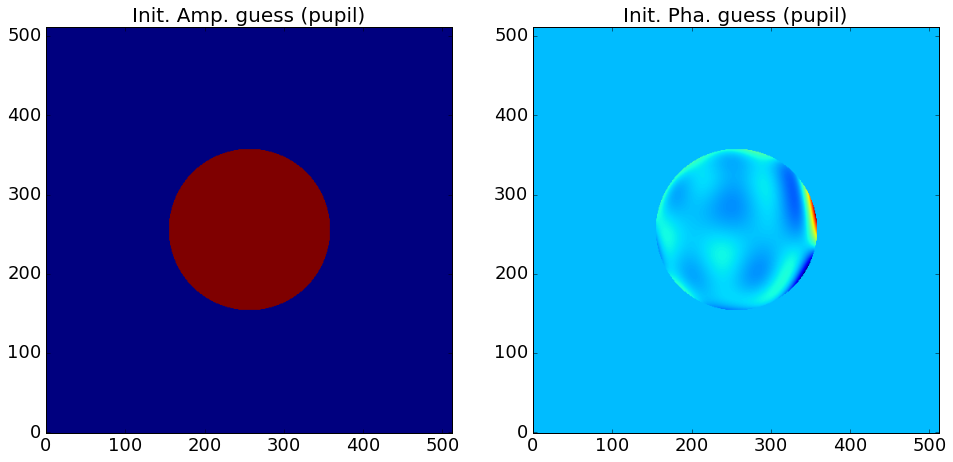

Current filter:


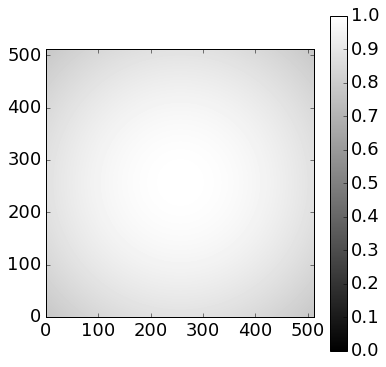

Current iter. : 100
        Error : 3.07e-02
Current iter. : 200
        Error : 3.07e-02
Current filter:


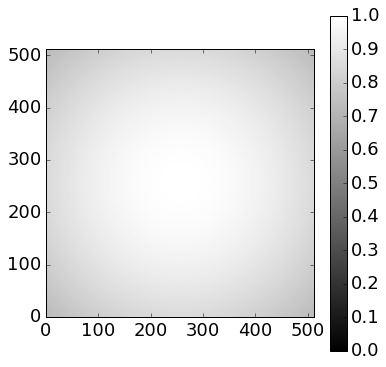

Current iter. : 300
        Error : 3.07e-02
Current iter. : 400
        Error : 3.07e-02
Current filter:


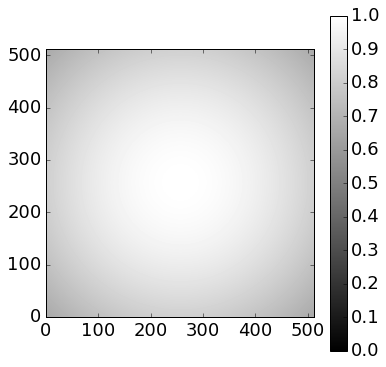

Current iter. : 500
        Error : 3.07e-02
Current iter. : 600
        Error : 3.07e-02
Current filter:


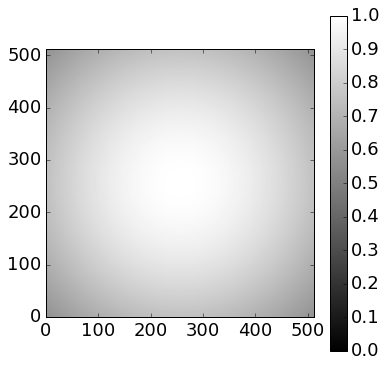

Current iter. : 700
        Error : 3.07e-02
Current iter. : 800
        Error : 3.07e-02
Current filter:


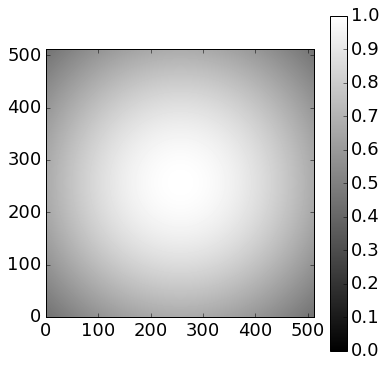

Current iter. : 900
        Error : 3.07e-02
Current iter. : 1000
        Error : 3.07e-02
Current filter:


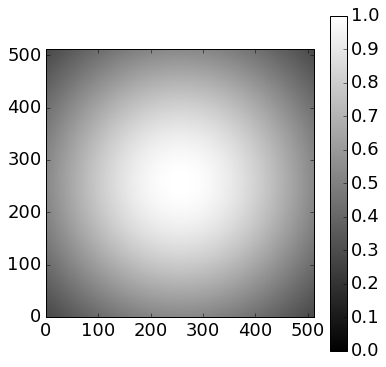

Current iter. : 1100
        Error : 3.07e-02
Current iter. : 1200
        Error : 3.07e-02
Current filter:


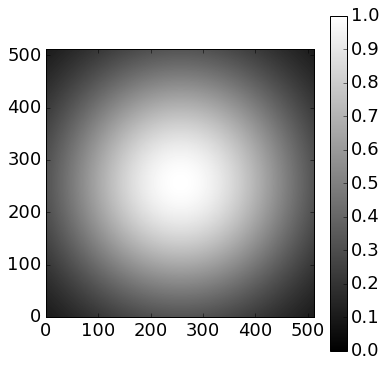

Current iter. : 1300
        Error : 3.07e-02
Current iter. : 1400
        Error : 3.07e-02
Current filter:


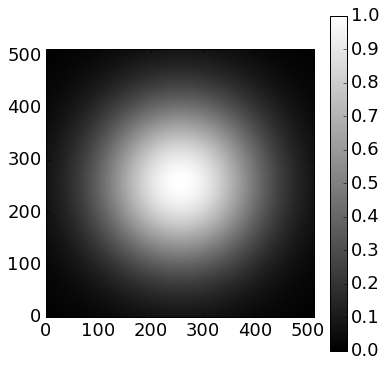

Current iter. : 1500
        Error : 3.07e-02
Current iter. : 1600
        Error : 3.07e-02
Current filter:


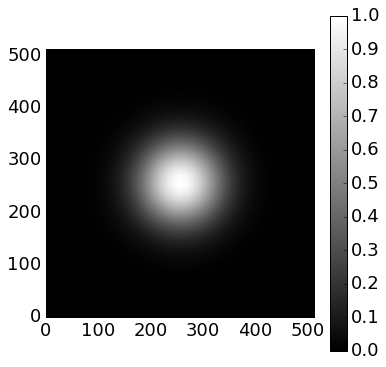

Current iter. : 1700
        Error : 3.07e-02
Current iter. : 1800
        Error : 3.07e-02
Current filter:


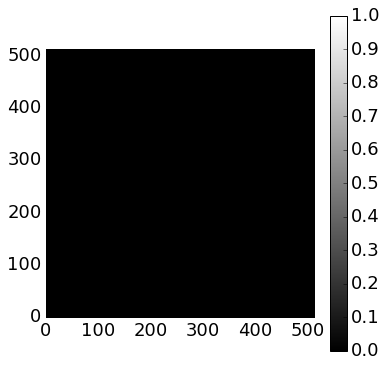

Current iter. : 1900
        Error : 3.07e-02
Current iter. : 2000
        Error : 3.07e-02
-----------------------
First iteration error: 9.48e-02
Final iteration : 2000
Final Error: 3.07e-02


In [130]:
no_aber_ori_pup,no_aber_ori_foc, \
no_aber_ori_errlist, \
no_aber_ori_pup_proj, \
no_aber_ori_errpuplist = no_aber_ori_PR.OSS(beta=0.5,force_only_phase=True,init='random')

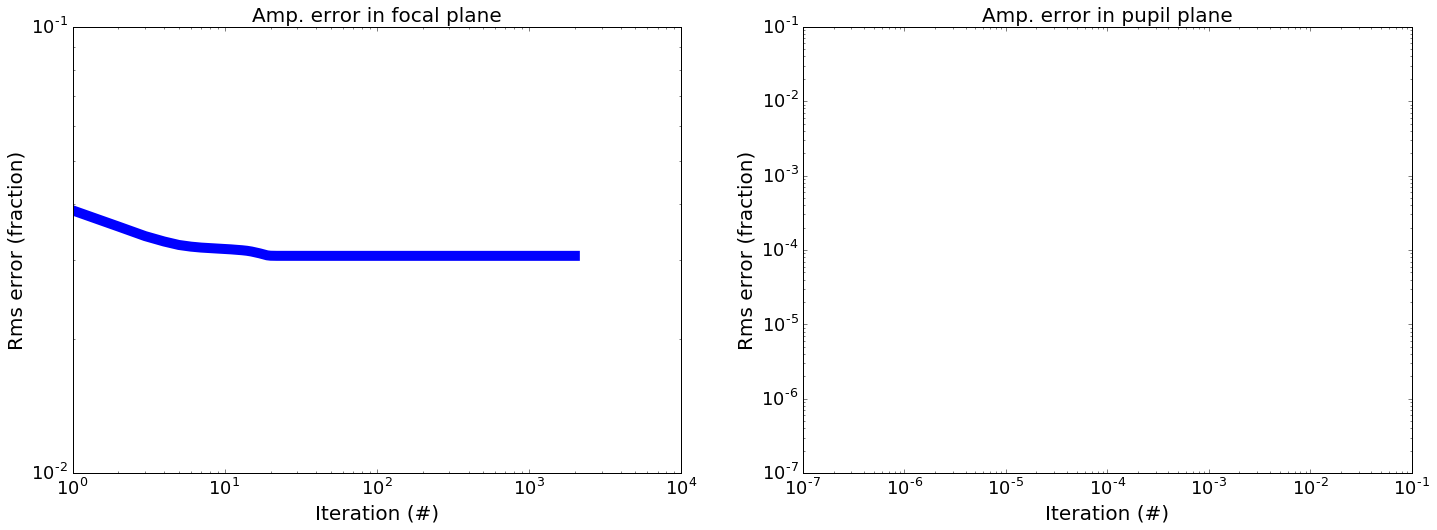

In [131]:
plot_errlist(no_aber_ori_errlist,no_aber_ori_errpuplist)

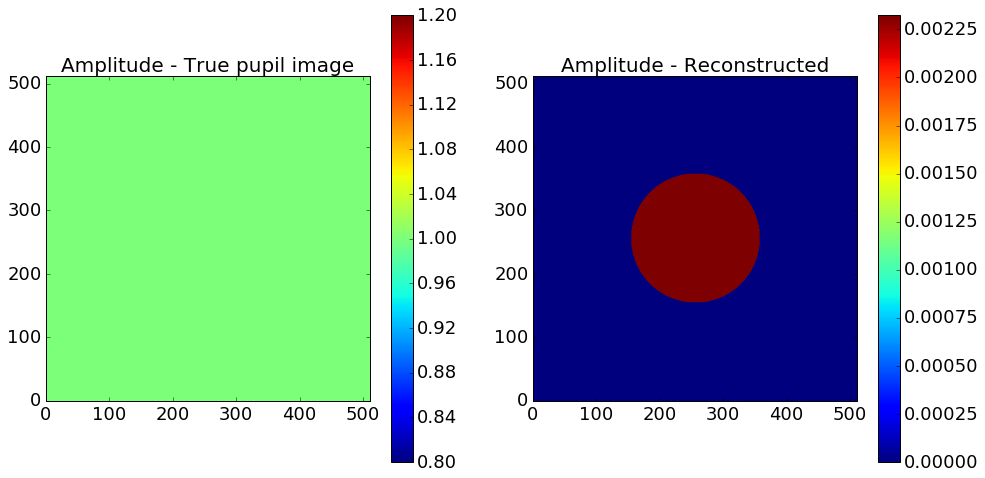

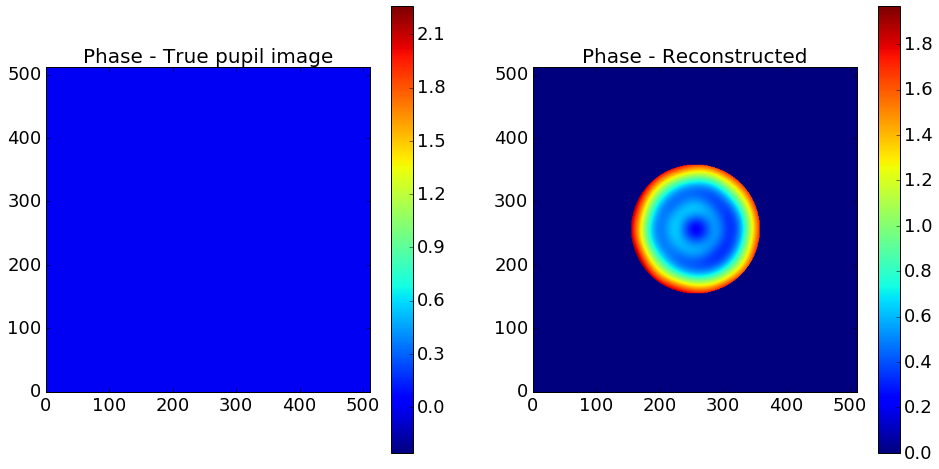

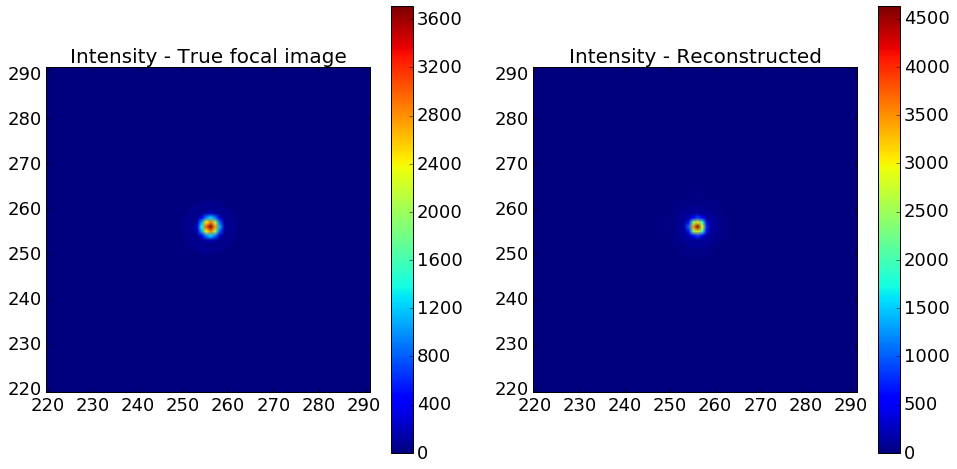

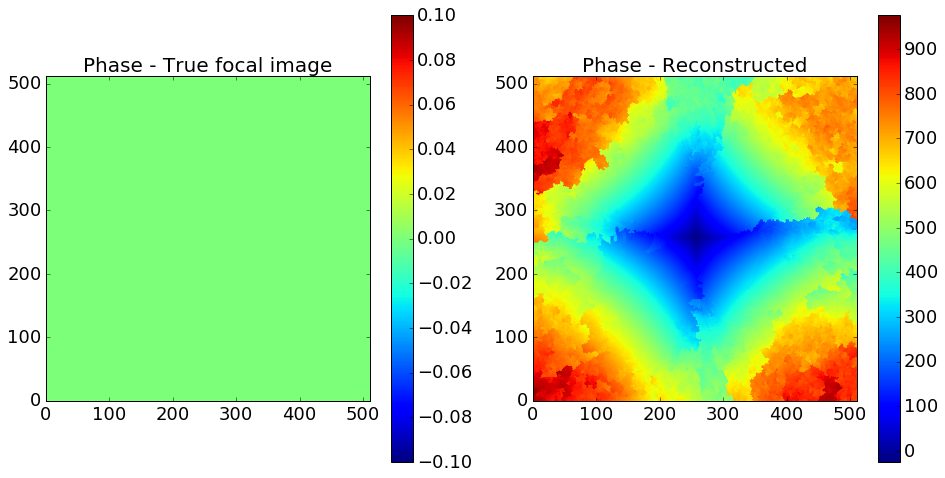

In [132]:
plot_recon(np.ones((Npix,Npix)),np.sqrt(no_aber_ori_PR.foc),no_aber_ori_pup_proj,no_aber_ori_foc)

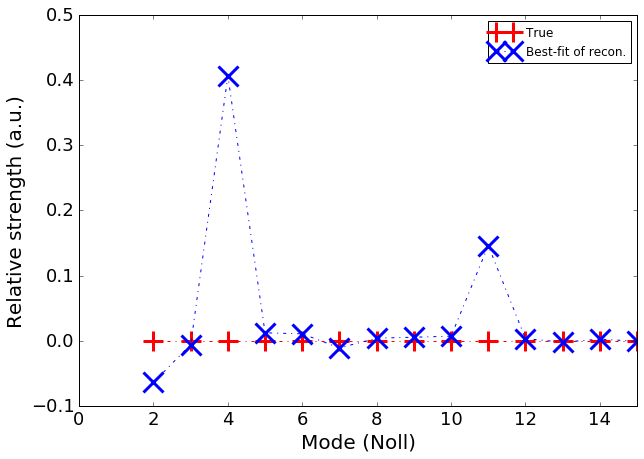

In [146]:
coef_no_aber_ori_true, \
coef_no_aber_ori_reco = wrap_up_zern_fit(no_aber_ori_PR,
                                         Recon_phasor=no_aber_ori_pup_proj,
                                         P_phasor=np.zeros((512,512)),
                                         oversamp=oversampo)

OK. If we trust the code, then this "-150nm focus" adjusted to correct for intrinsic defocusing is then not precise enough - leaving some small defocusing.

And the 11th mode is spherical

#### 2. Plus 300

In [133]:
plus_300_ori_PR = PR(foc=plus_300_ori_clp,oversamp=oversampo)

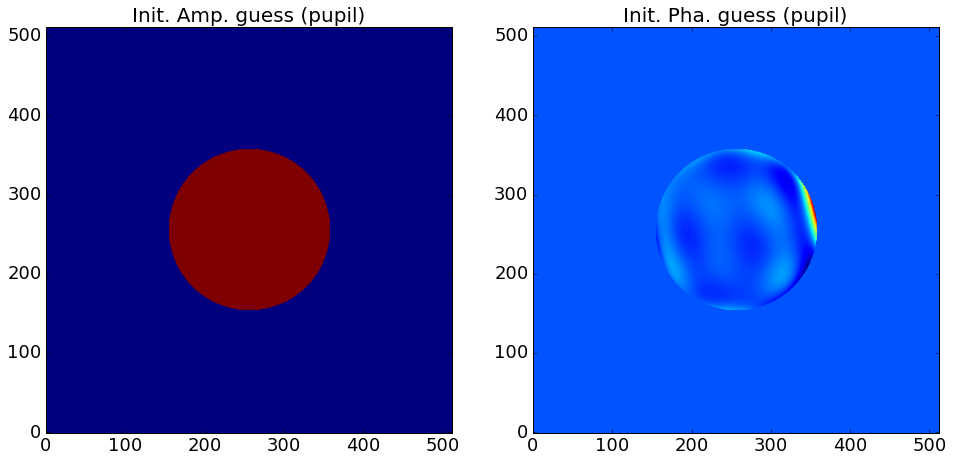

Current filter:


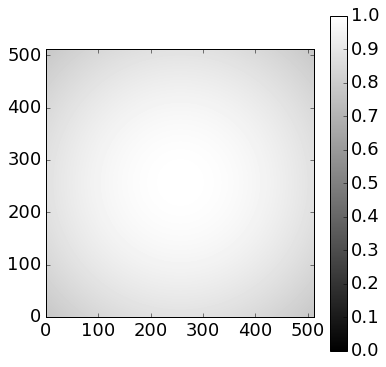

Current iter. : 100
        Error : 2.38e-02
Current iter. : 200
        Error : 2.38e-02
Current filter:


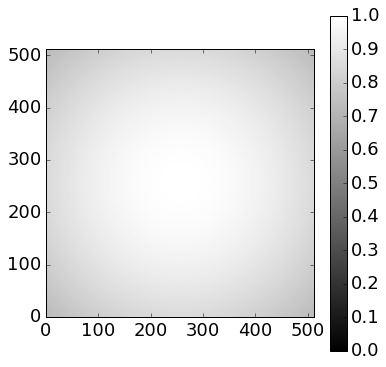

Current iter. : 300
        Error : 2.38e-02
Current iter. : 400
        Error : 2.38e-02
Current filter:


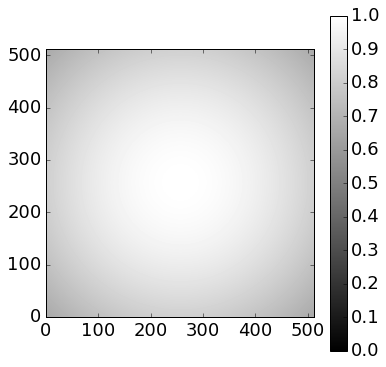

Current iter. : 500
        Error : 2.38e-02
Current iter. : 600
        Error : 2.38e-02
Current filter:


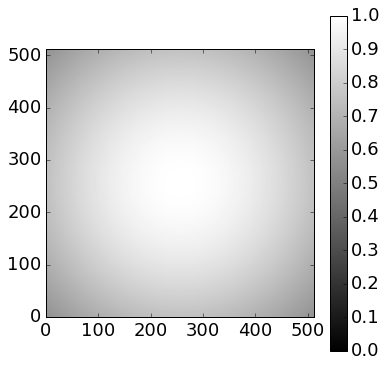

Current iter. : 700
        Error : 2.38e-02
Current iter. : 800
        Error : 2.38e-02
Current filter:


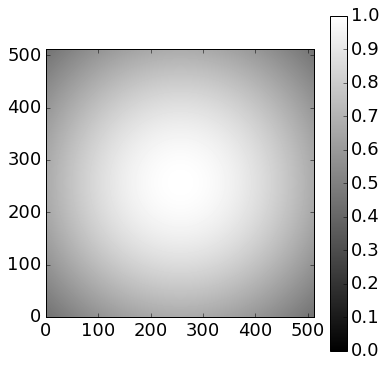

Current iter. : 900
        Error : 2.38e-02
Current iter. : 1000
        Error : 2.38e-02
Current filter:


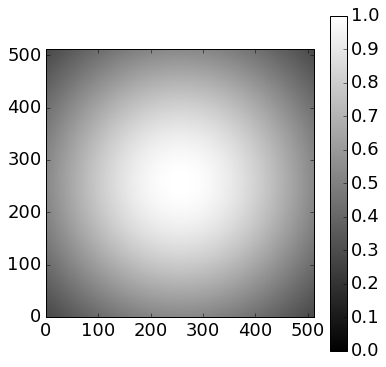

Current iter. : 1100
        Error : 2.38e-02
Current iter. : 1200
        Error : 2.38e-02
Current filter:


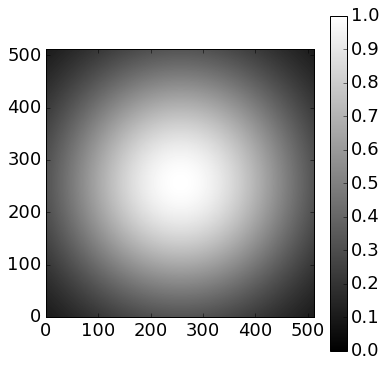

Current iter. : 1300
        Error : 2.38e-02
Current iter. : 1400
        Error : 2.38e-02
Current filter:


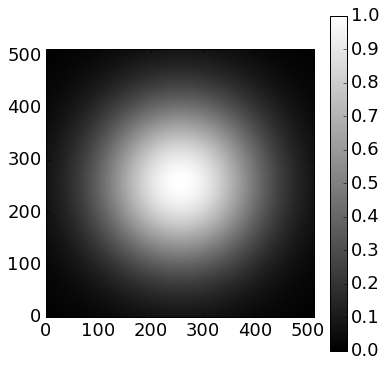

Current iter. : 1500
        Error : 2.38e-02
Current iter. : 1600
        Error : 2.38e-02
Current filter:


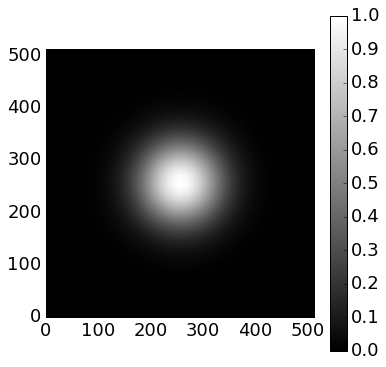

Current iter. : 1700
        Error : 2.38e-02
Current iter. : 1800
        Error : 2.38e-02
Current filter:


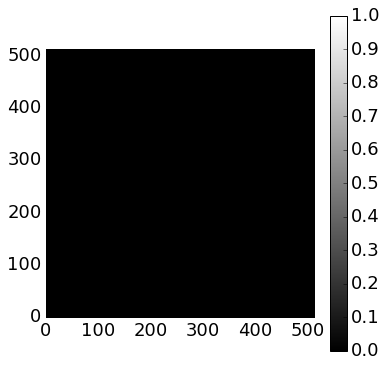

Current iter. : 1900
        Error : 2.38e-02
Current iter. : 2000
        Error : 2.38e-02
-----------------------
First iteration error: 5.69e-02
Final iteration : 2000
Final Error: 2.38e-02


In [134]:
plus_300_ori_pup,plus_300_ori_foc, \
plus_300_ori_errlist, \
plus_300_ori_pup_proj, \
plus_300_ori_errpuplist = plus_300_ori_PR.OSS(beta=0.5,force_only_phase=True,init='random')

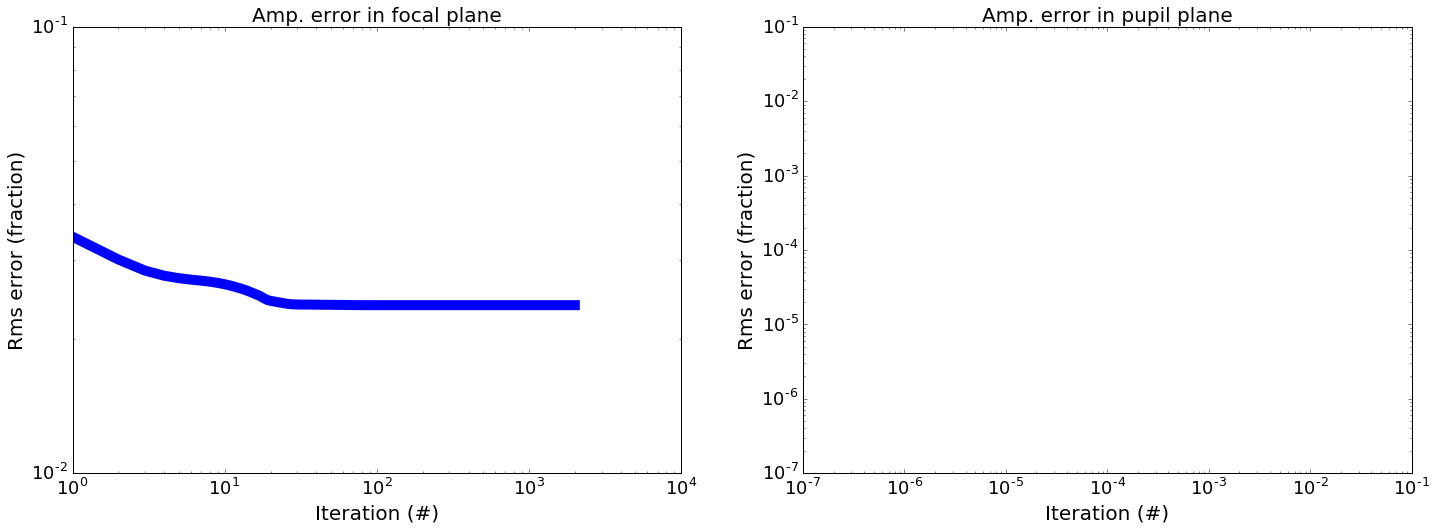

In [135]:
plot_errlist(plus_300_ori_errlist,plus_300_ori_errpuplist)

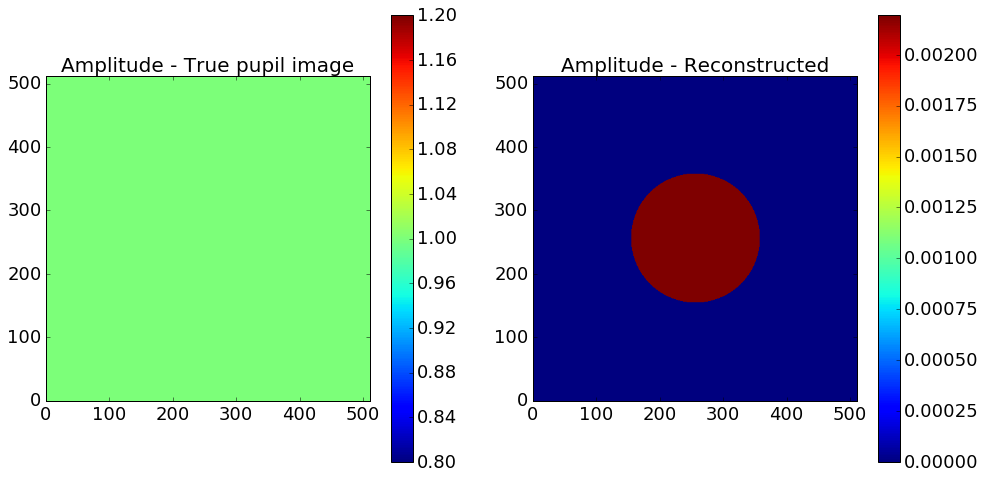

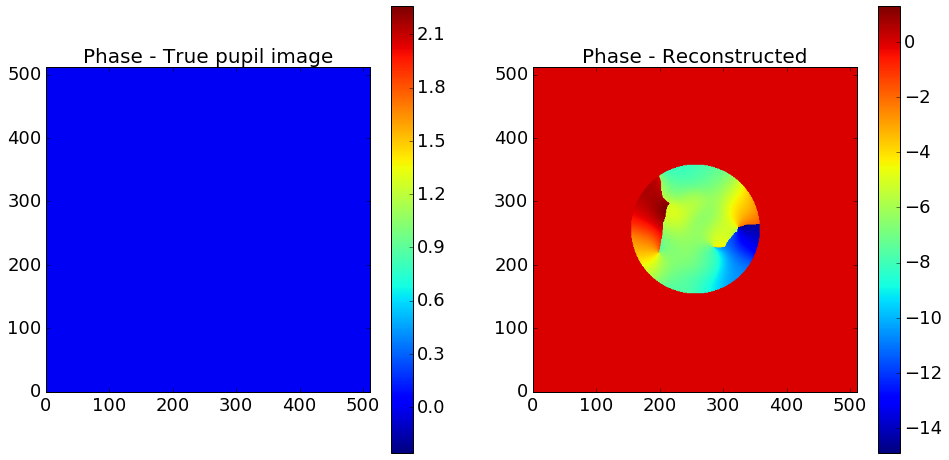

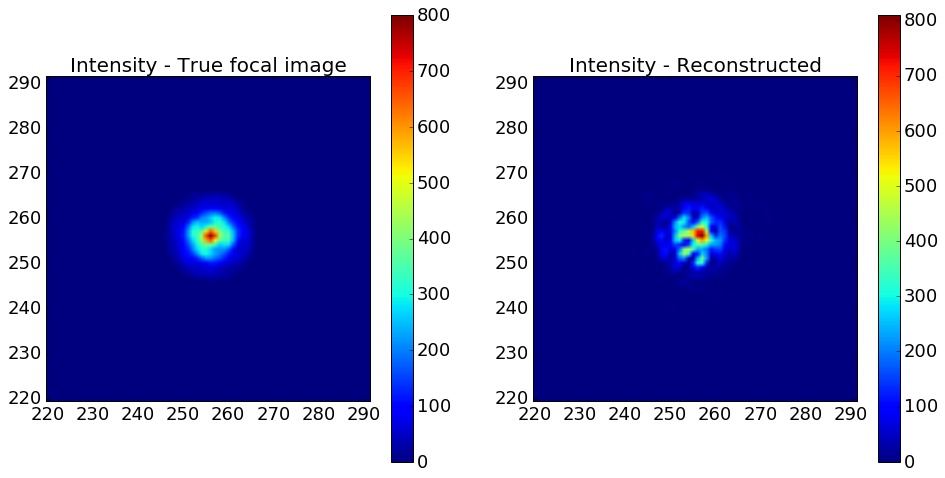

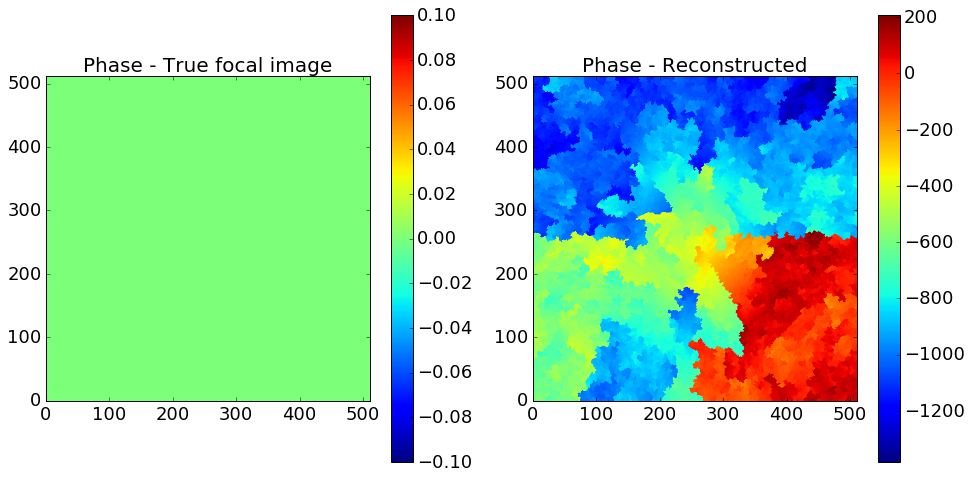

In [136]:
plot_recon(np.ones((Npix,Npix)),np.sqrt(plus_300_ori_PR.foc),plus_300_ori_pup_proj,plus_300_ori_foc)

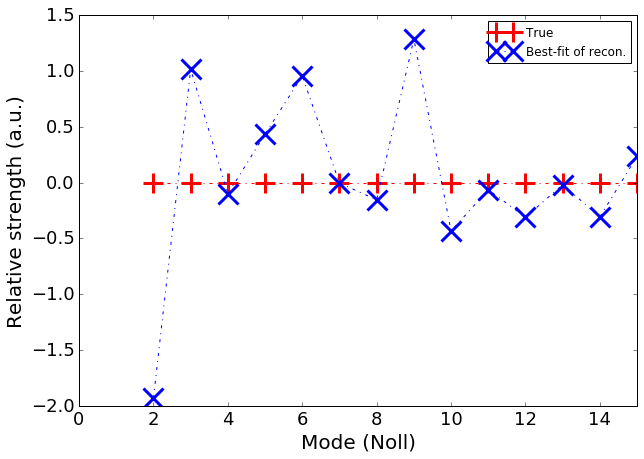

In [145]:
coef_plus_300_ori_true, \
coef_plus_300_ori_reco = wrap_up_zern_fit(plus_300_ori_PR,
                                          Recon_phasor=plus_300_ori_pup_proj,
                                          P_phasor=np.zeros((512,512)),
                                          oversamp=oversampo)

What exactly was done for this image?

#### 3. Ast. 150

In [138]:
ast_150_ori_PR = PR(foc=ast_150_ori_clp,oversamp=oversampo)

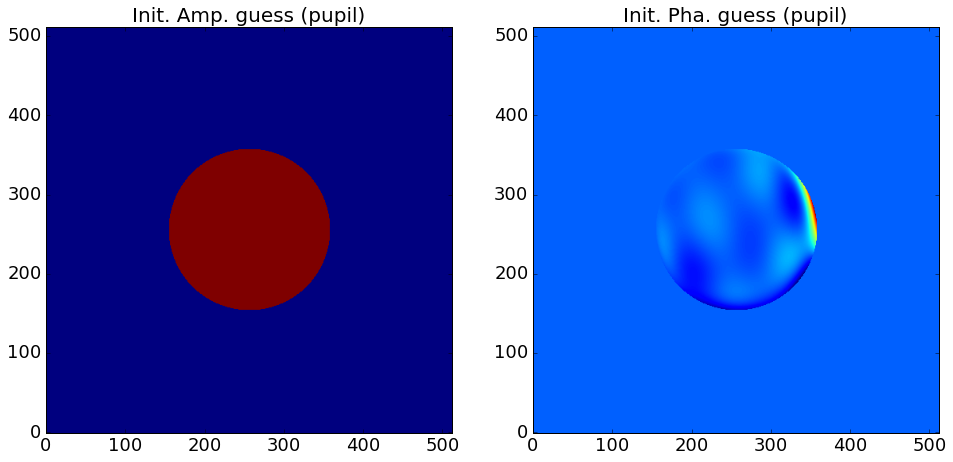

Current filter:


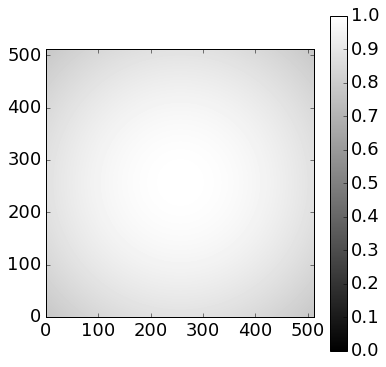

Current iter. : 100
        Error : 2.57e-02
Current iter. : 200
        Error : 2.57e-02
Current filter:


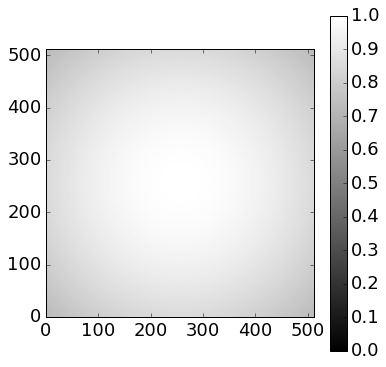

Current iter. : 300
        Error : 2.57e-02
Current iter. : 400
        Error : 2.57e-02
Current filter:


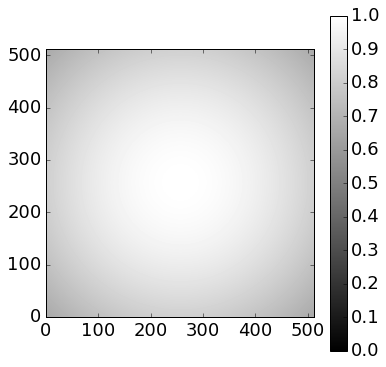

Current iter. : 500
        Error : 2.57e-02
Current iter. : 600
        Error : 2.57e-02
Current filter:


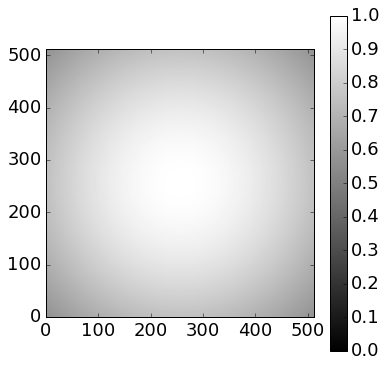

Current iter. : 700
        Error : 2.57e-02
Current iter. : 800
        Error : 2.57e-02
Current filter:


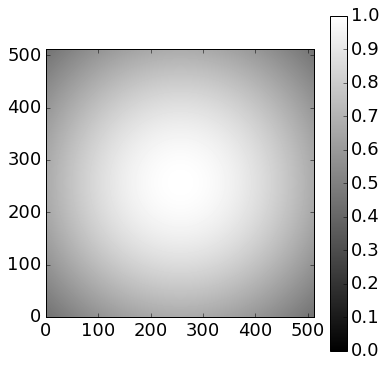

Current iter. : 900
        Error : 2.57e-02
Current iter. : 1000
        Error : 2.57e-02
Current filter:


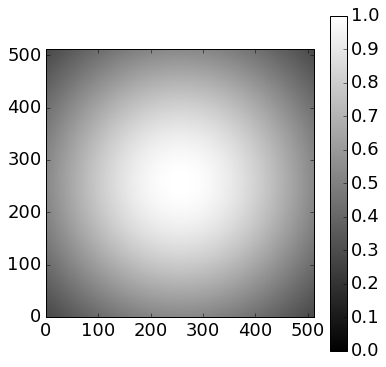

Current iter. : 1100
        Error : 2.57e-02
Current iter. : 1200
        Error : 2.57e-02
Current filter:


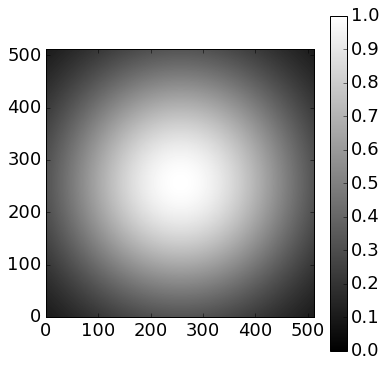

Current iter. : 1300
        Error : 2.57e-02
Current iter. : 1400
        Error : 2.57e-02
Current filter:


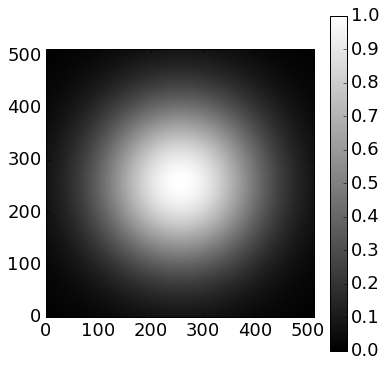

Current iter. : 1500
        Error : 2.57e-02
Current iter. : 1600
        Error : 2.57e-02
Current filter:


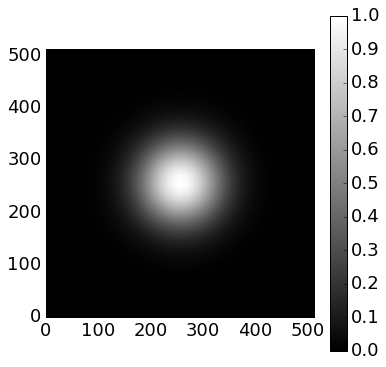

Current iter. : 1700
        Error : 2.57e-02
Current iter. : 1800
        Error : 2.57e-02
Current filter:


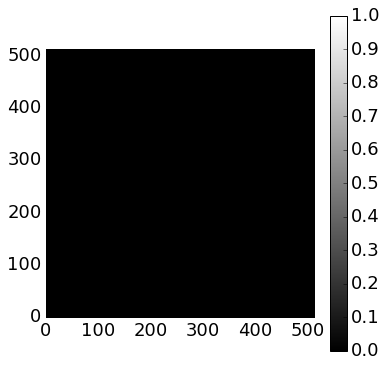

Current iter. : 1900
        Error : 2.57e-02
Current iter. : 2000
        Error : 2.57e-02
-----------------------
First iteration error: 5.67e-02
Final iteration : 2000
Final Error: 2.57e-02


In [139]:
ast_150_ori_pup,ast_150_ori_foc, \
ast_150_ori_errlist, \
ast_150_ori_pup_proj, \
ast_150_ori_errpuplist = ast_150_ori_PR.OSS(beta=0.5,force_only_phase=True,init='random')

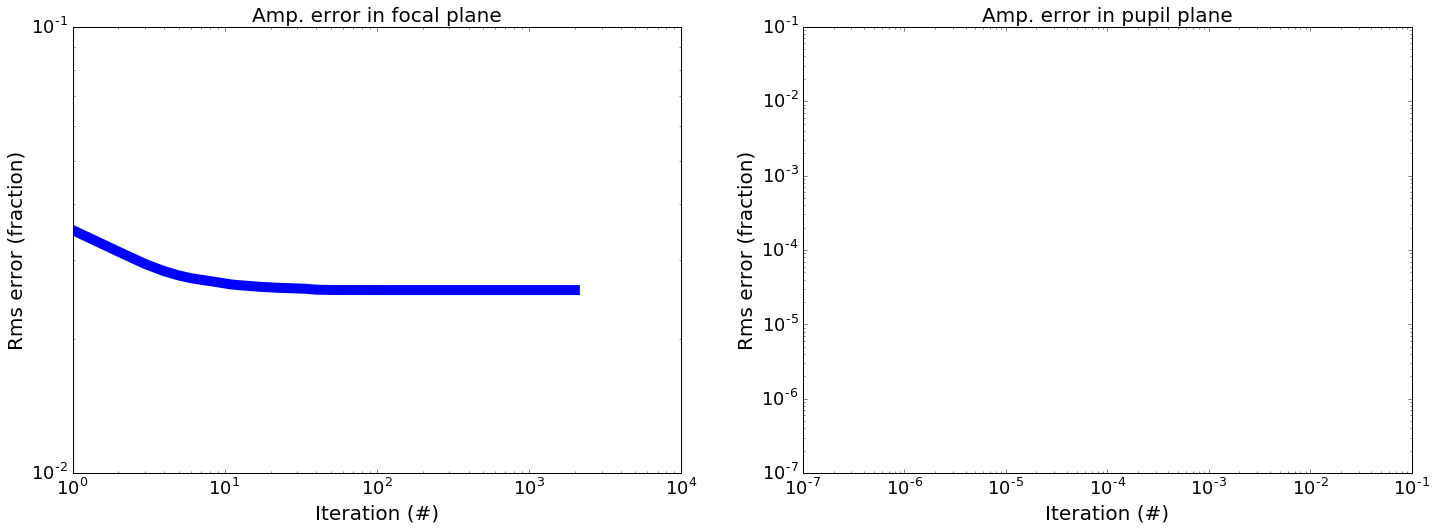

In [140]:
plot_errlist(ast_150_ori_errlist,ast_150_ori_errpuplist)

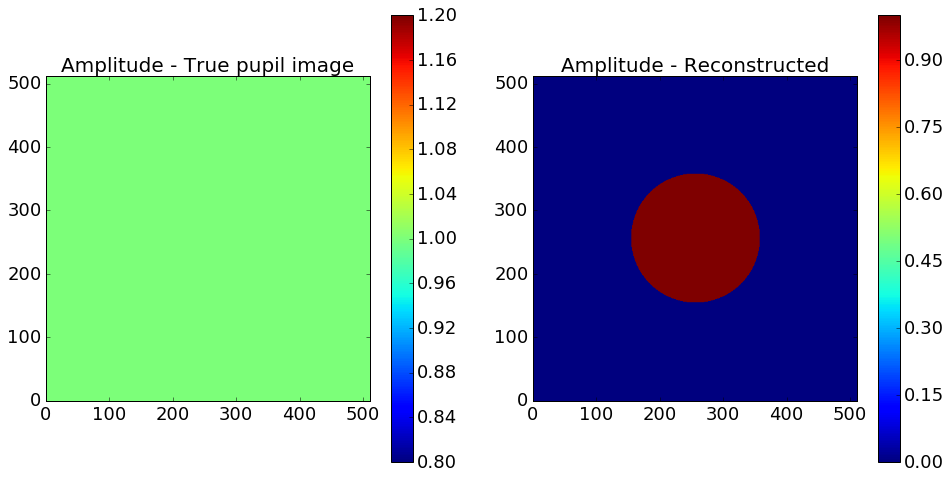

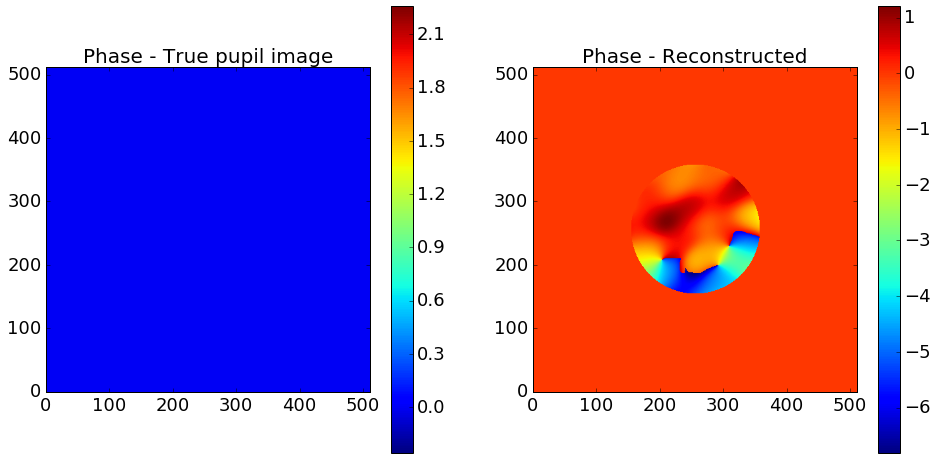

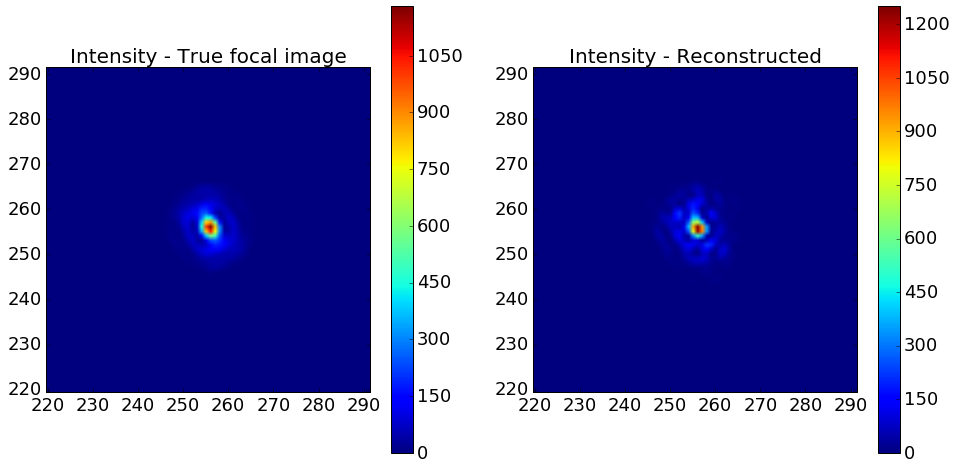

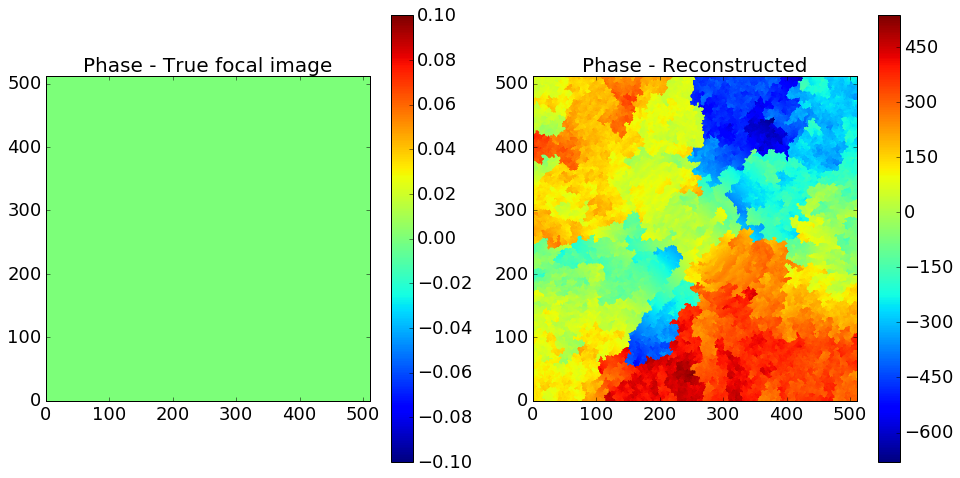

In [141]:
plot_recon(np.ones((Npix,Npix)),np.sqrt(ast_150_ori_PR.foc),ast_150_ori_pup_proj,ast_150_ori_foc)

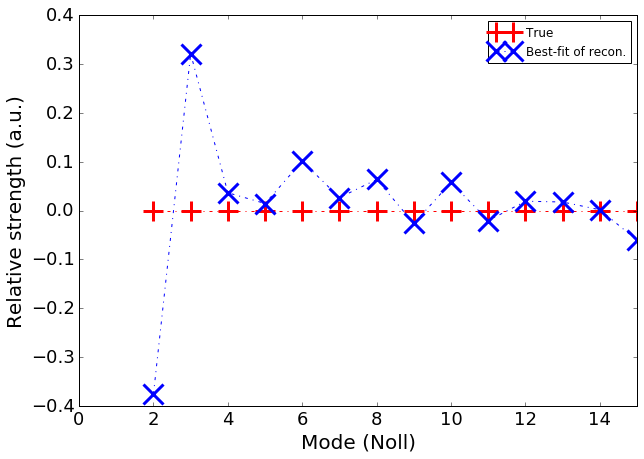

In [142]:
coef_ast_ori_150_true, \
coef_ast_ori_150_reco = wrap_up_zern_fit(ast_150_ori_PR,
                                         Recon_phasor=ast_150_ori_pup_proj,
                                         P_phasor=np.zeros((512,512)),
                                         oversamp=oversampo)

#### 4. Ast. 50 only

In [174]:
ast_50_ori_PR = PR(foc=ast_50_ori_clp,oversamp=oversampo)

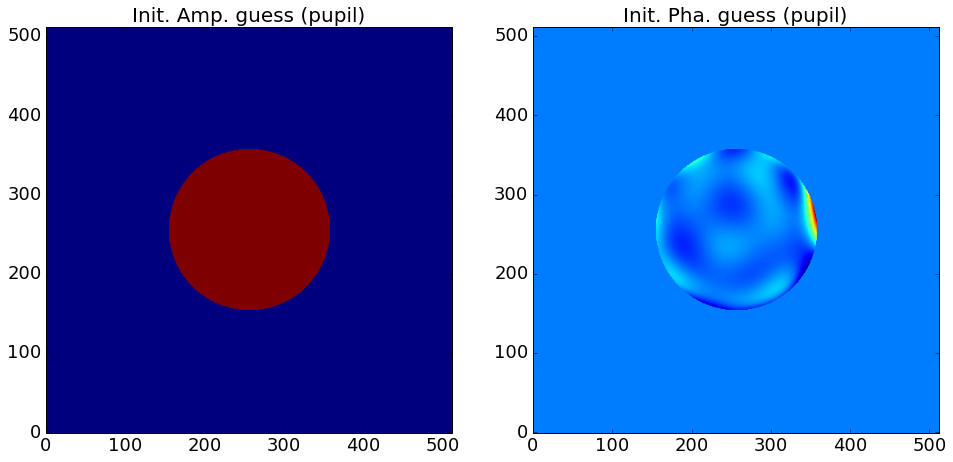

Current filter:


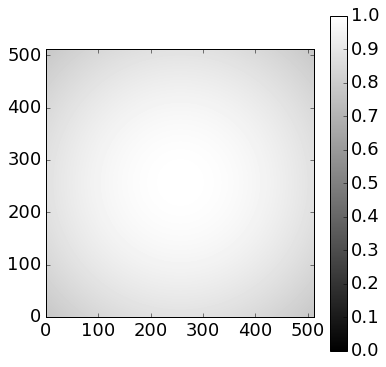

Current iter. : 100
        Error : 3.06e-02
Current iter. : 200
        Error : 3.03e-02
Current filter:


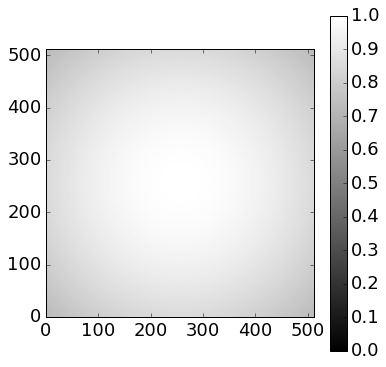

Current iter. : 300
        Error : 3.03e-02
Current iter. : 400
        Error : 3.03e-02
Current filter:


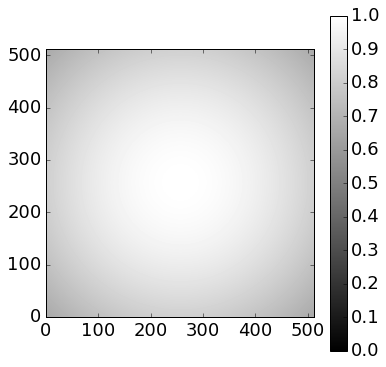

Current iter. : 500
        Error : 3.03e-02
Current iter. : 600
        Error : 3.03e-02
Current filter:


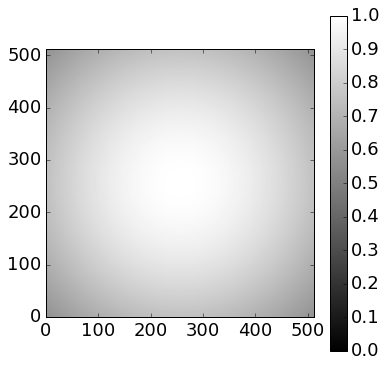

Current iter. : 700
        Error : 3.03e-02
Current iter. : 800
        Error : 3.03e-02
Current filter:


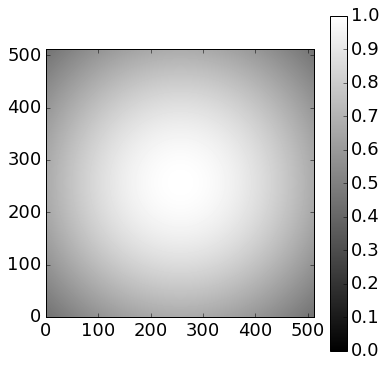

Current iter. : 900
        Error : 3.03e-02
Current iter. : 1000
        Error : 3.03e-02
Current filter:


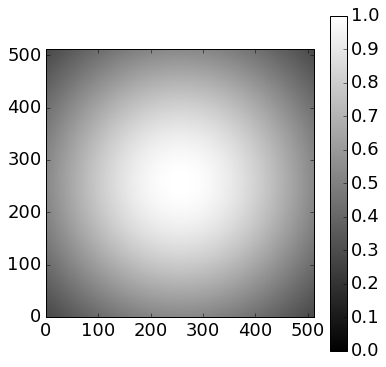

Current iter. : 1100
        Error : 3.03e-02
Current iter. : 1200
        Error : 3.03e-02
Current filter:


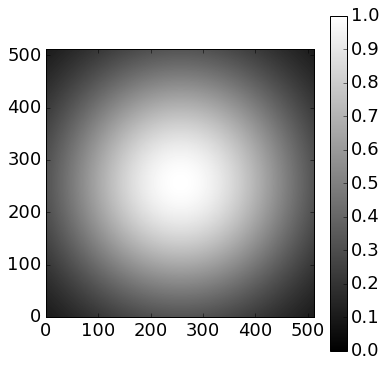

Current iter. : 1300
        Error : 3.03e-02
Current iter. : 1400
        Error : 3.03e-02
Current filter:


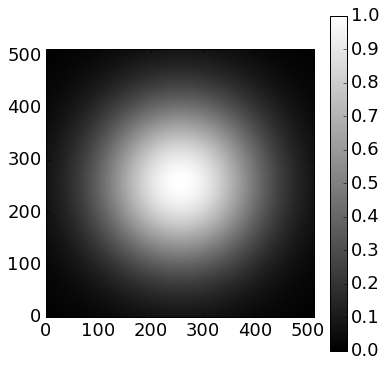

Current iter. : 1500
        Error : 3.03e-02
Current iter. : 1600
        Error : 3.03e-02
Current filter:


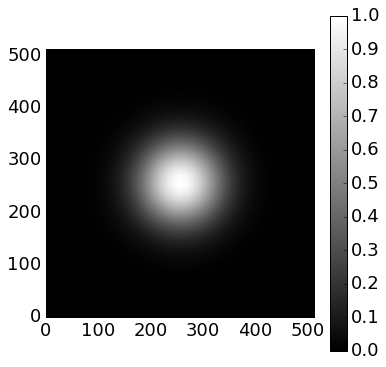

Current iter. : 1700
        Error : 3.03e-02
Current iter. : 1800
        Error : 3.03e-02
Current filter:


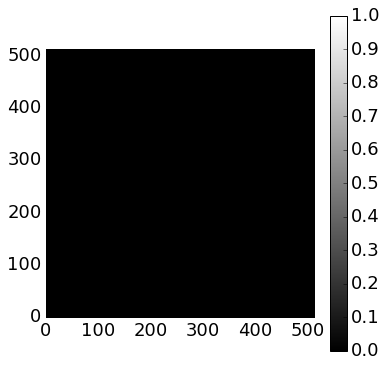

Current iter. : 1900
        Error : 3.03e-02
Current iter. : 2000
        Error : 3.03e-02
-----------------------
First iteration error: 1.07e-01
Final iteration : 2000
Final Error: 3.03e-02


In [175]:
ast_50_ori_pup,ast_50_ori_foc, \
ast_50_ori_errlist, \
ast_50_ori_pup_proj, \
ast_50_ori_errpuplist = ast_50_ori_PR.OSS(beta=0.5,force_only_phase=True,init='random')

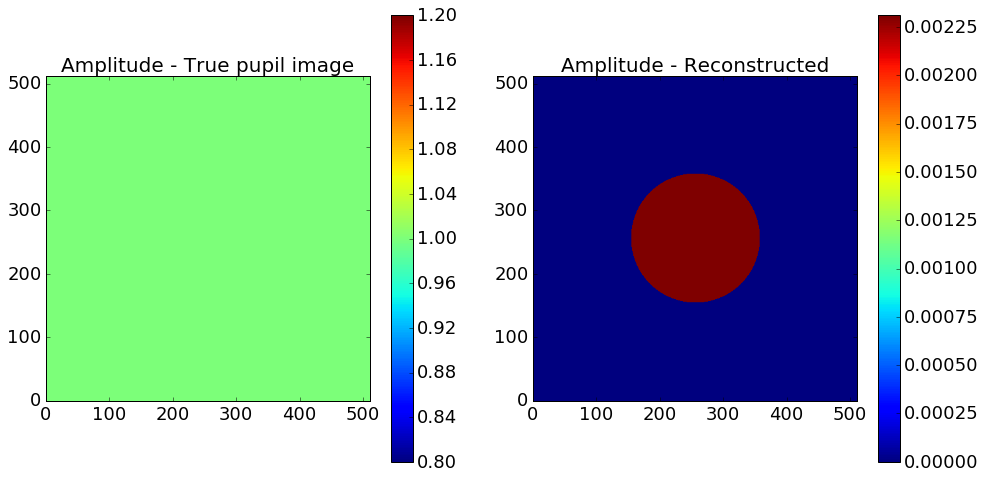

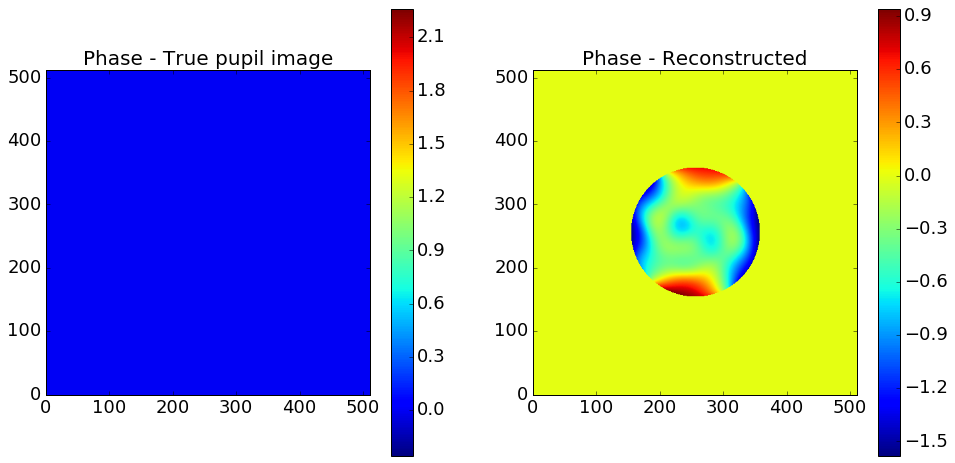

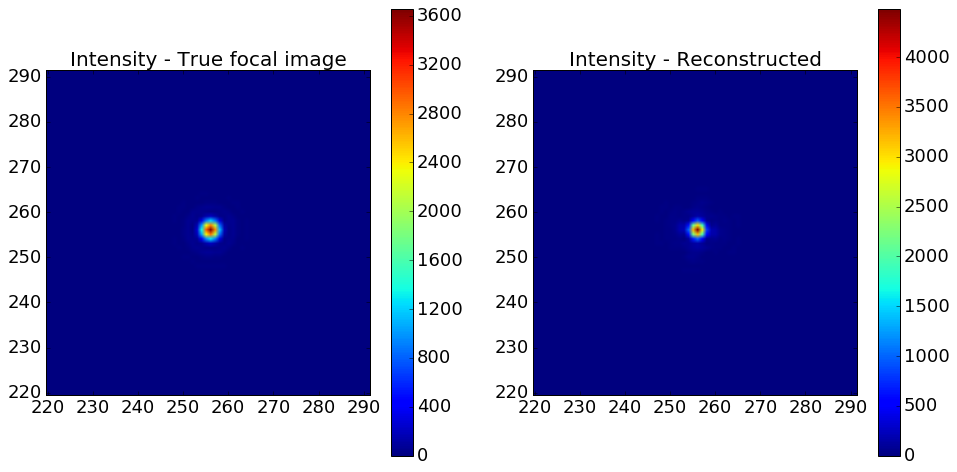

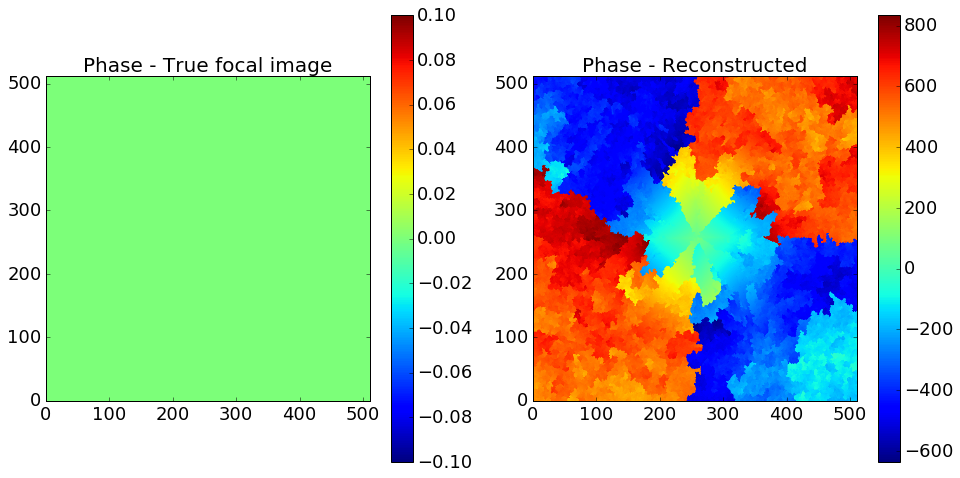

In [176]:
plot_recon(np.ones((Npix,Npix)),np.sqrt(ast_50_ori_PR.foc),ast_50_ori_pup_proj,ast_50_ori_foc)

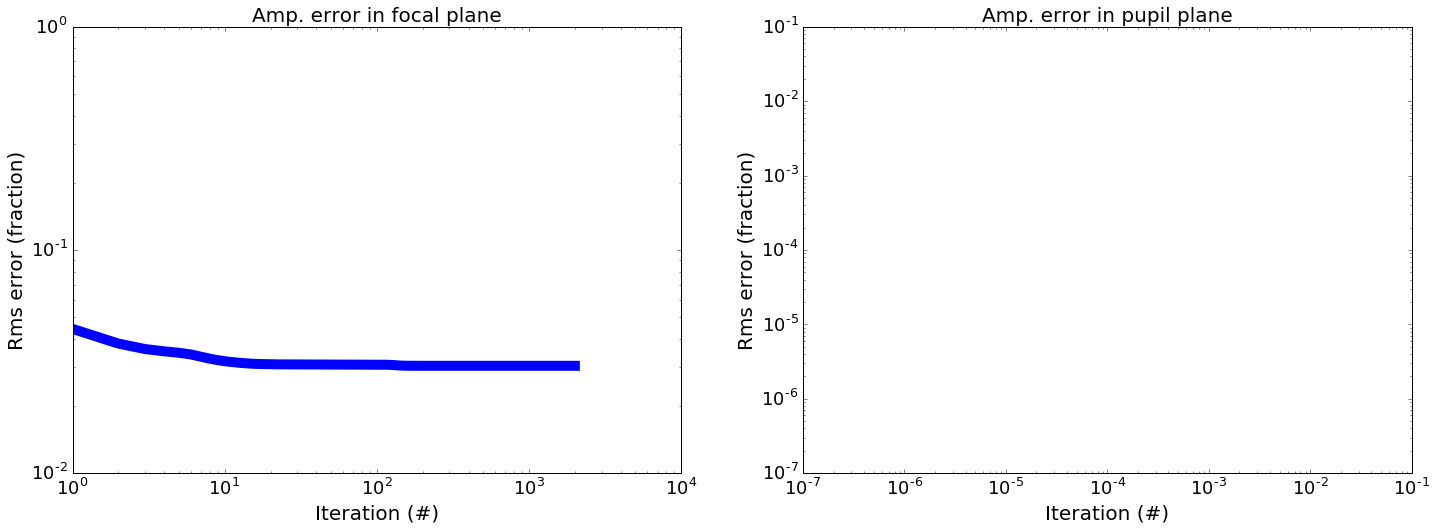

In [177]:
plot_errlist(ast_50_ori_errlist,ast_50_ori_errpuplist)

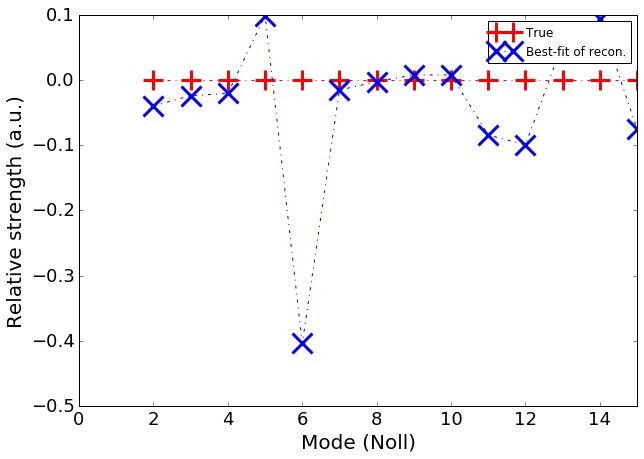

In [178]:
coef_ast_ori_50_true, \
coef_ast_ori_50_reco = wrap_up_zern_fit(ast_50_ori_PR,
                                        Recon_phasor=ast_50_ori_pup_proj,
                                        P_phasor=np.zeros((512,512)),
                                        oversamp=oversampo)

Interesting... Now it fails

#### 5. Complex1

In [179]:
complex1_ori_PR = PR(foc=complex1_ori_clp,oversamp=oversampo)

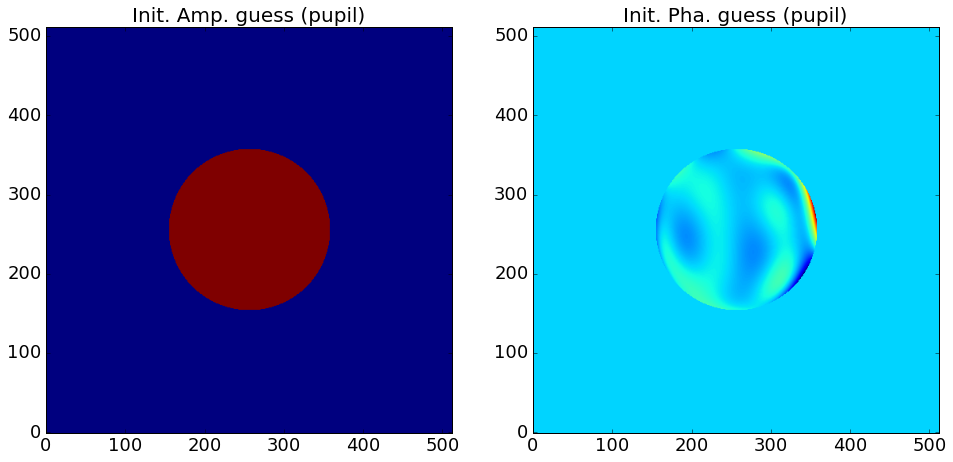

Current filter:


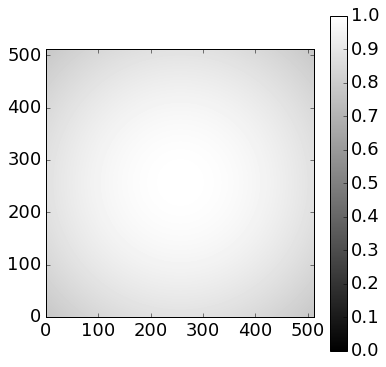

Current iter. : 100
        Error : 2.57e-02
Current iter. : 200
        Error : 2.57e-02
Current filter:


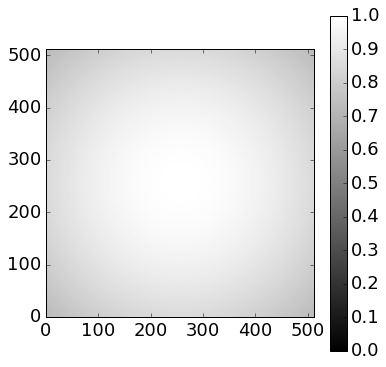

Current iter. : 300
        Error : 2.57e-02
Current iter. : 400
        Error : 2.57e-02
Current filter:


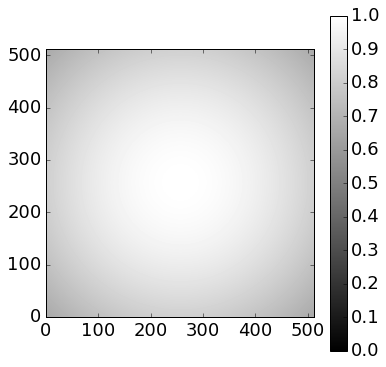

Current iter. : 500
        Error : 2.57e-02
Current iter. : 600
        Error : 2.57e-02
Current filter:


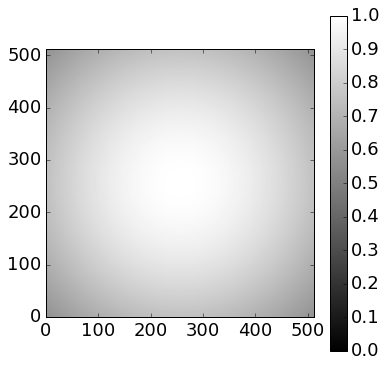

Current iter. : 700
        Error : 2.57e-02
Current iter. : 800
        Error : 2.57e-02
Current filter:


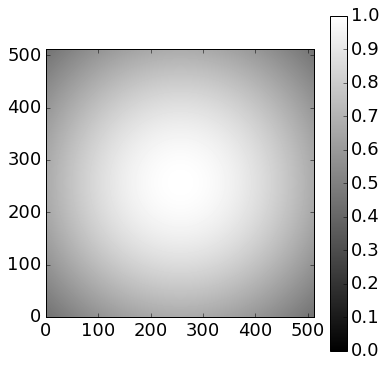

Current iter. : 900
        Error : 2.57e-02
Current iter. : 1000
        Error : 2.57e-02
Current filter:


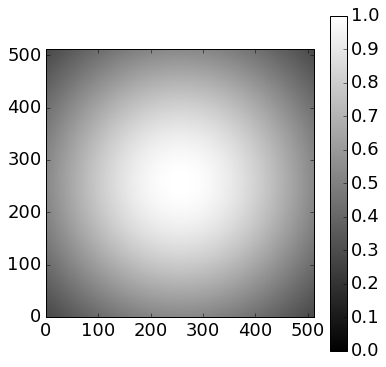

Current iter. : 1100
        Error : 2.57e-02
Current iter. : 1200
        Error : 2.57e-02
Current filter:


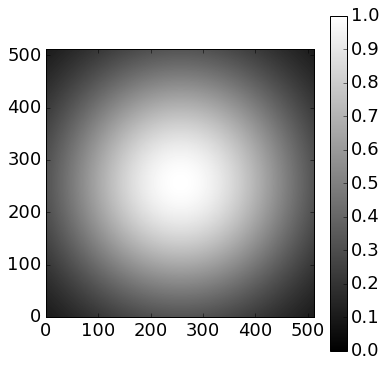

Current iter. : 1300
        Error : 2.57e-02
Current iter. : 1400
        Error : 2.57e-02
Current filter:


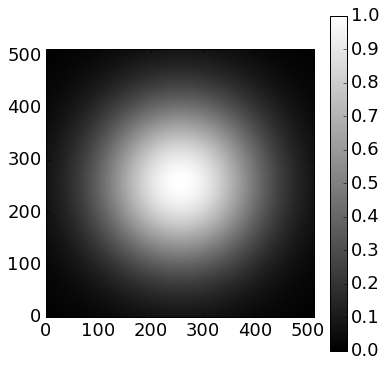

Current iter. : 1500
        Error : 2.57e-02
Current iter. : 1600
        Error : 2.57e-02
Current filter:


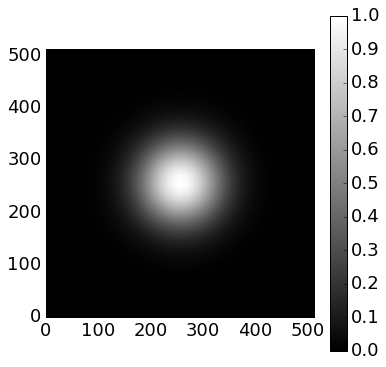

Current iter. : 1700
        Error : 2.57e-02
Current iter. : 1800
        Error : 2.57e-02
Current filter:


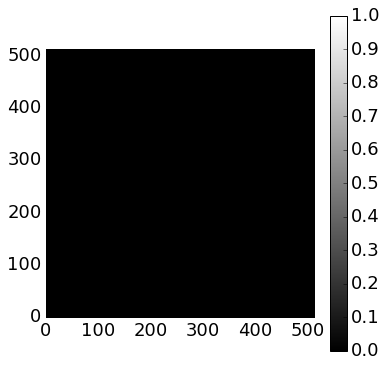

Current iter. : 1900
        Error : 2.57e-02
Current iter. : 2000
        Error : 2.57e-02
-----------------------
First iteration error: 8.78e-02
Final iteration : 2000
Final Error: 2.57e-02


In [180]:
complex1_ori_pup,complex1_ori_foc, \
complex1_ori_errlist, \
complex1_ori_pup_proj, \
complex1_ori_errpuplist = complex1_ori_PR.OSS(beta=0.5,force_only_phase=True,init='random')

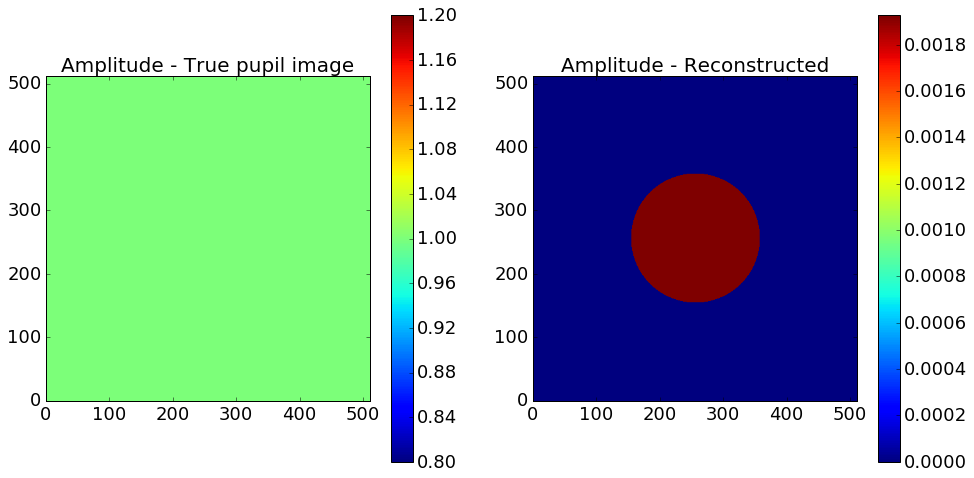

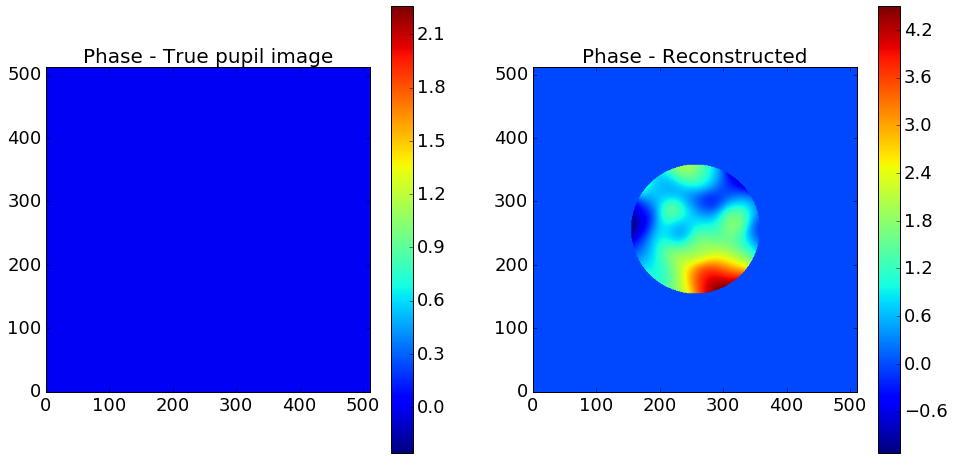

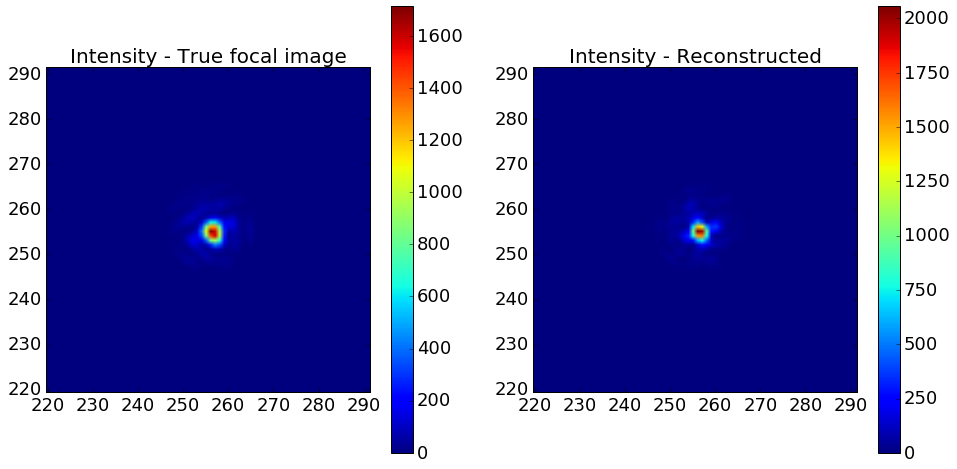

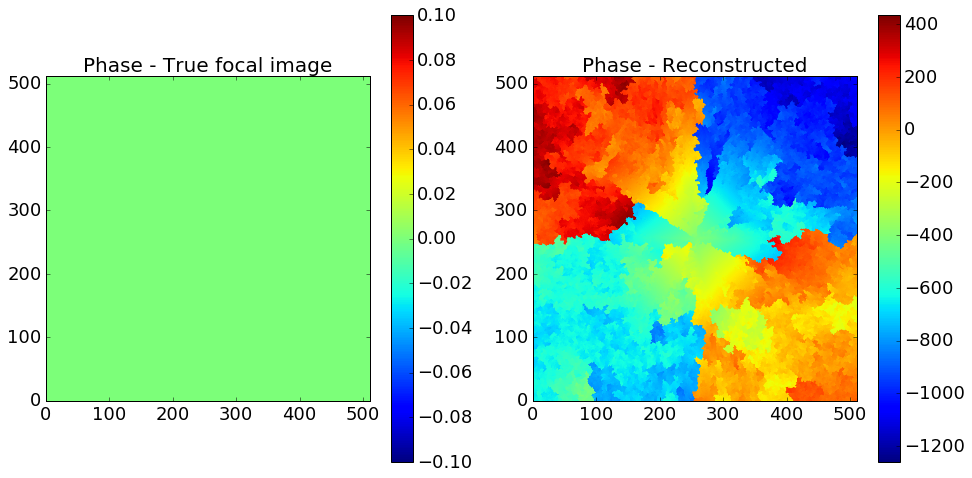

In [181]:
plot_recon(np.ones((Npix,Npix)),np.sqrt(complex1_ori_PR.foc),complex1_ori_pup_proj,complex1_ori_foc)

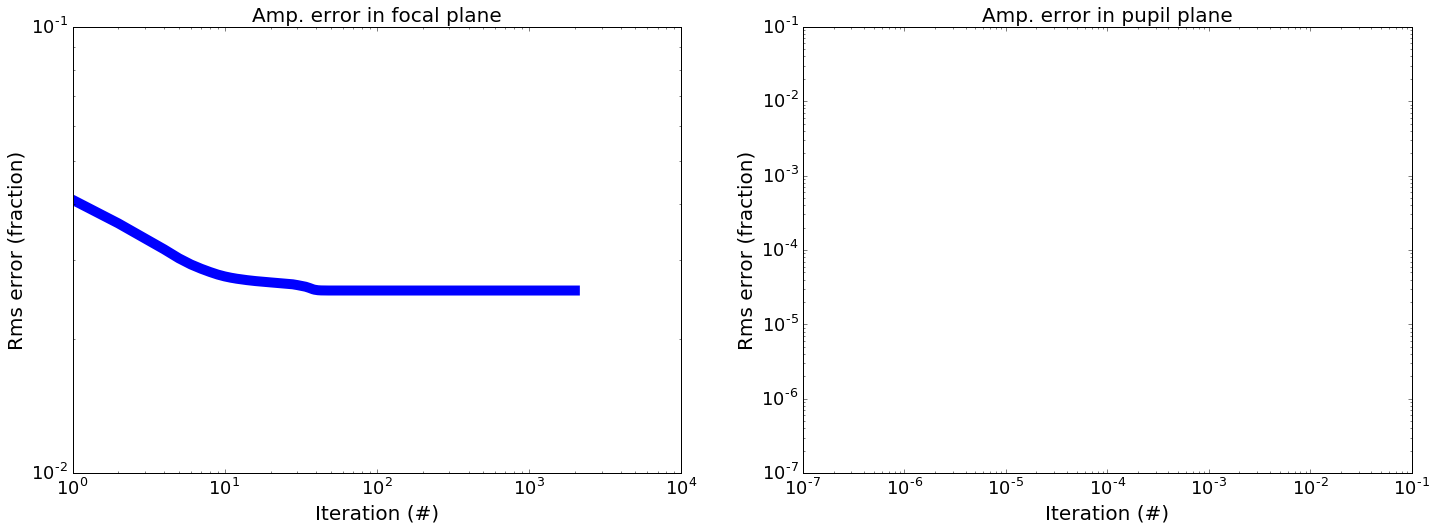

In [182]:
plot_errlist(complex1_ori_errlist,complex1_ori_errpuplist)

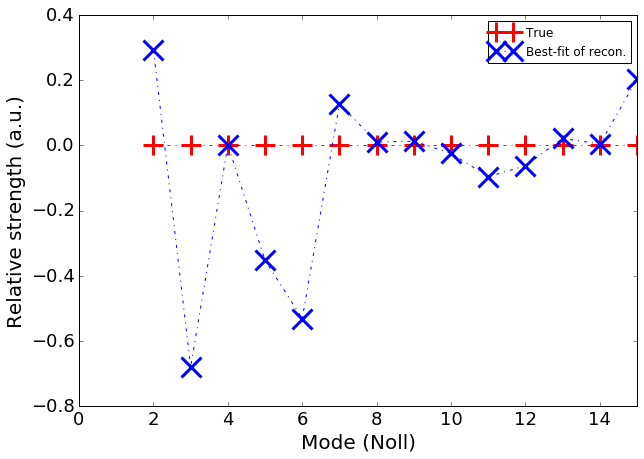

In [184]:
coef_complex1_ori_true, \
coef_complex1_ori_reco = wrap_up_zern_fit(complex1_ori_PR,
                                          Recon_phasor=complex1_ori_pup_proj,
                                          P_phasor=np.zeros((512,512)),
                                          oversamp=oversampo)

---
## Conclusion (?)
- Ambiguity of orientation left? Some seem well-reconstructed but the Zernike mode fitting shows inconsistency. Thus the suspicion.
- Some work better when rotated, others opposite
- Assigning non-integer center as integral one would be manifested as "tip/tilt"
- More complex/noisy images are recovered worse.